This is my capstone project for the Udacity Machine Learning Nanodegree.

In [1]:
import pandas as pd
import numpy as np
import keras as kr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os import listdir

Using TensorFlow backend.


Get the data.

In [2]:
directory = 'sandp500/individual_stocks_5yr'
dir_listing = listdir(directory)

In [3]:
symbols_list = []

for symbol in dir_listing:
    symb = symbol.split('_')[0]
    symbols_list.append(symb)

print(len(symbols_list))
print(symbols_list[0])

504
AAL


In [4]:
csv_file = '{}/{}_data.csv'.format(directory, symbols_list[0])

In [5]:
dataset = pd.read_csv(csv_file)

In [6]:
dataset = dataset.assign(trading_date = pd.to_datetime(dataset['Date']))

In [7]:
dataset = dataset.drop('Name', 1)
dataset = dataset.drop('Date', 1)
dataset.set_index(['trading_date'], inplace=True)

In [8]:
display(dataset.head(10))

Open   High    Low  Close    Volume
trading_date                                      
2013-12-09    23.85  25.44  23.45  24.60  43197268
2013-12-10    24.50  25.17  24.41  24.88  18660625
2013-12-11    25.48  27.20  25.37  25.99  38843371
2013-12-12    26.20  26.71  25.45  25.45  19981824
2013-12-13    25.75  26.30  25.52  26.23  12192421
2013-12-16    26.63  26.77  26.35  26.61  13190945
2013-12-17    26.48  26.59  25.95  26.10  11413199
2013-12-18    25.99  26.23  25.55  26.23   9994162
2013-12-19    26.12  26.49  25.82  26.12   6916497
2013-12-20    26.18  26.49  26.14  26.33   8530924

This code is for comparing the different columns of the raw data. 

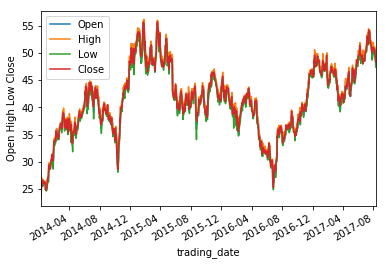

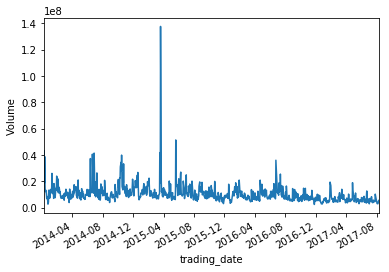

In [9]:
dataset[['Open', 'High', 'Low', 'Close']].plot()
plt.ylabel('Open High Low Close')
plt.show()
dataset['Volume'].plot()
plt.ylabel('Volume')
plt.show()

The following is graphing a few of the graphs with the opening price and the volume on one graph to compare with two different axis'.  I thought to do this as a comparison between the opening price (which all the raw data features follow roughly the same line) and the volume feature.  Since the volume feature is important. [http://www.investopedia.com/terms/v/volume.asp]

In [10]:
def getting_preprocessed_data(symbol):
        csv_file = '{}/{}_data.csv'.format(directory, symbol)
        df = pd.read_csv(csv_file)
        df = df.assign(trading_date = pd.to_datetime(df['Date']))
        df = df.drop('Name', 1)
        df = df.drop('Date', 1)
        df.set_index(['trading_date'], inplace=True)

        # below was found at https://stackoverflow.com/questions/29314033/python-pandas-dataframe-remove-empty-cells
        df['Open'].replace('', np.nan, inplace=True)
        df.dropna(subset=['Open'], inplace=True)
        return df

def plotting_stocks(symbols_list, amount_of_stocks=0):
    if amount_of_stocks == 0:
        amount_of_stocks = len(symbols_list)
        
    for symbol in symbols_list[:amount_of_stocks]:
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.7)
        df = getting_preprocessed_data(symbol)
        print(symbol)
        df.Open.plot(ax=ax, style='b-', figsize=(20,10))
        # same ax as above since it's automatically added on the right
        df.Volume.plot(ax=ax, style='r-', secondary_y=True, figsize=(20,10))
        # add legend --> take advantage of pandas providing us access
        # to the line associated with the right part of the axis
        #ax.legend([ax.get_lines()[0], ax.get_lines()[0]], ['Open','Volume'], bbox_to_anchor=(1.5, 0.5))
        plt.ylabel('Open Price and Volume', fontsize=16)
        plt.show()
        #below is the Daily Returns calculation to put into the Sharpe Ratio. 
        df_preprocessed = df.assign(Daily_Returns = np.divide((df.Open - df.Close), df.Close) * 100)

        #Below is the calculation for the Sharpe Ratio column. 
        df_preprocessed = df_preprocessed.assign(Sharpe_Ratio = np.divide((df_preprocessed.Daily_Returns - 0.046), np.std(np.array([df_preprocessed.Open, df_preprocessed.High, df_preprocessed.Low, df_preprocessed.Close]))))

        #Below is the rate of change (momentum) for the specific stock. 
        df_preprocessed = df_preprocessed.assign(Rate_of_Change = (np.divide(df_preprocessed.Close, df_preprocessed.Open) - 1) * 100)

        #df.plot.scatter(x='Open', y='Volume', label="AAL")
        log_df = np.log(df)
        log_df.plot.scatter(x='Volume', y='Open', label="AAL", figsize=(20,10))
        plt.ylabel('Open Price', fontsize=16)
        plt.show()
        df_preprocessed.plot.scatter(x='Open', y='Sharpe_Ratio', label="Sharpe Ratio Open", figsize=(20,10))
        plt.ylabel('Open Price', fontsize=16)
        plt.show()
        df_preprocessed.plot.scatter(x='Volume',y='Sharpe_Ratio', label="Sharpe Ratio Close", figsize=(20,10), use_index=True)
        plt.ylabel('Volume', fontsize=16)
        plt.show()
        display(df_preprocessed.head(10))

AAL


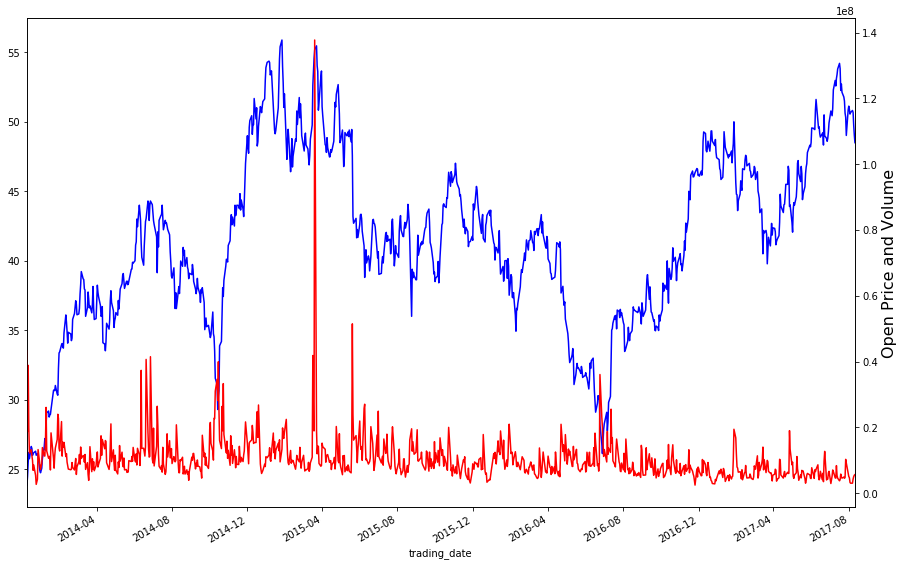

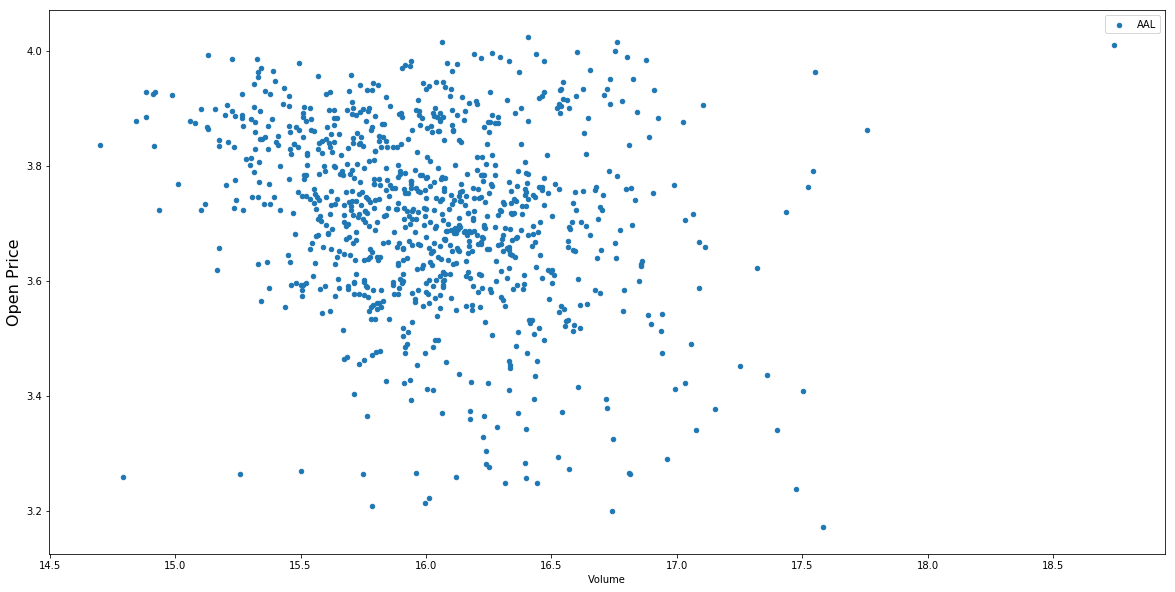

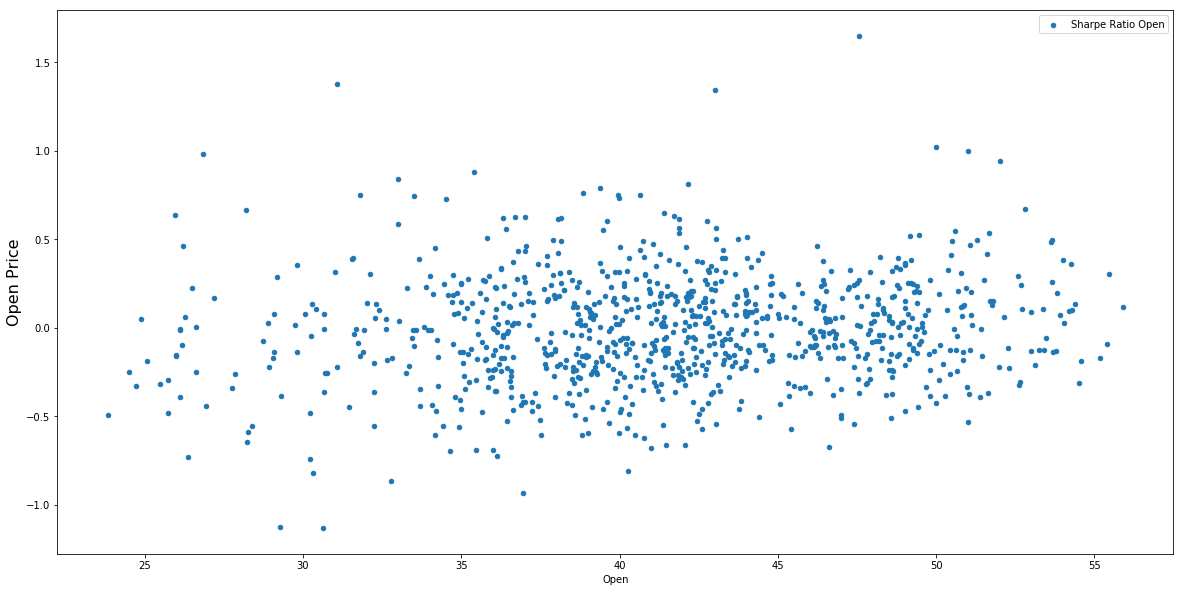

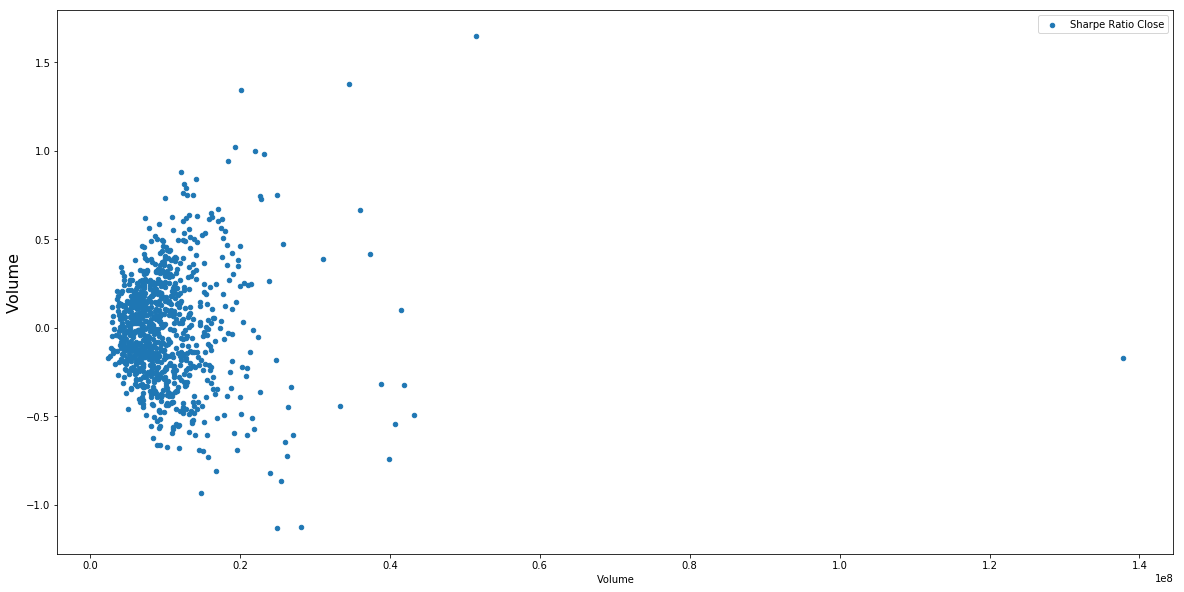

Open   High    Low  Close    Volume  Daily_Returns  \
trading_date                                                        
2013-12-09    23.85  25.44  23.45  24.60  43197268      -3.048780   
2013-12-10    24.50  25.17  24.41  24.88  18660625      -1.527331   
2013-12-11    25.48  27.20  25.37  25.99  38843371      -1.962293   
2013-12-12    26.20  26.71  25.45  25.45  19981824       2.946955   
2013-12-13    25.75  26.30  25.52  26.23  12192421      -1.829966   
2013-12-16    26.63  26.77  26.35  26.61  13190945       0.075160   
2013-12-17    26.48  26.59  25.95  26.10  11413199       1.455939   
2013-12-18    25.99  26.23  25.55  26.23   9994162      -0.914983   
2013-12-19    26.12  26.49  25.82  26.12   6916497       0.000000   
2013-12-20    26.18  26.49  26.14  26.33   8530924      -0.569692   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2013-12-09       -0.490958        3.144654  
2013-12-10       -0.249594        1.551020  
2013-12-11       -0.318597        2.001570  
2013-12-12        0.460209       -2.862595  
2013-12-13       -0.297604        1.864078  
2013-12-16        0.004626       -0.075103  
2013-12-17        0.223674       -1.435045  
2013-12-18       -0.152451        0.923432  
2013-12-19       -0.007297        0.000000  
2013-12-20       -0.097674        0.572956

AAPL


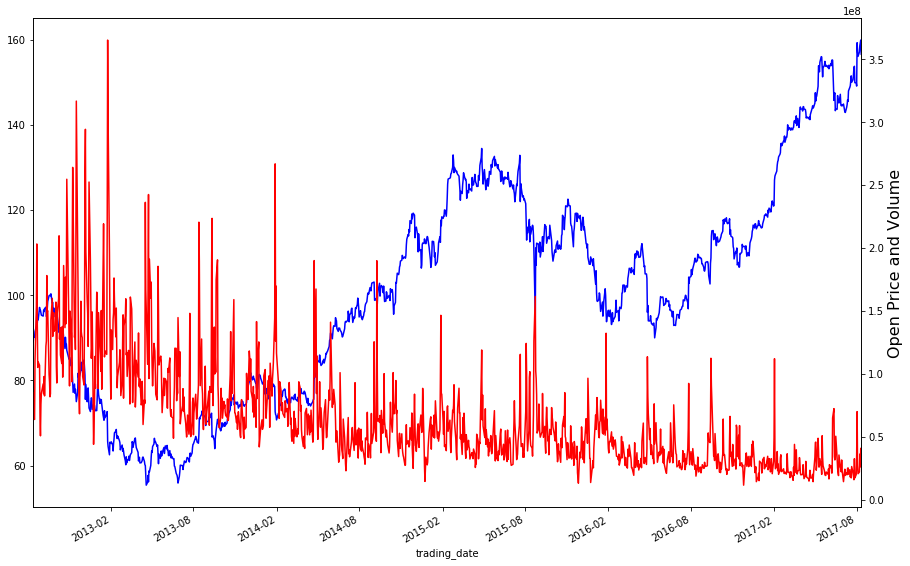

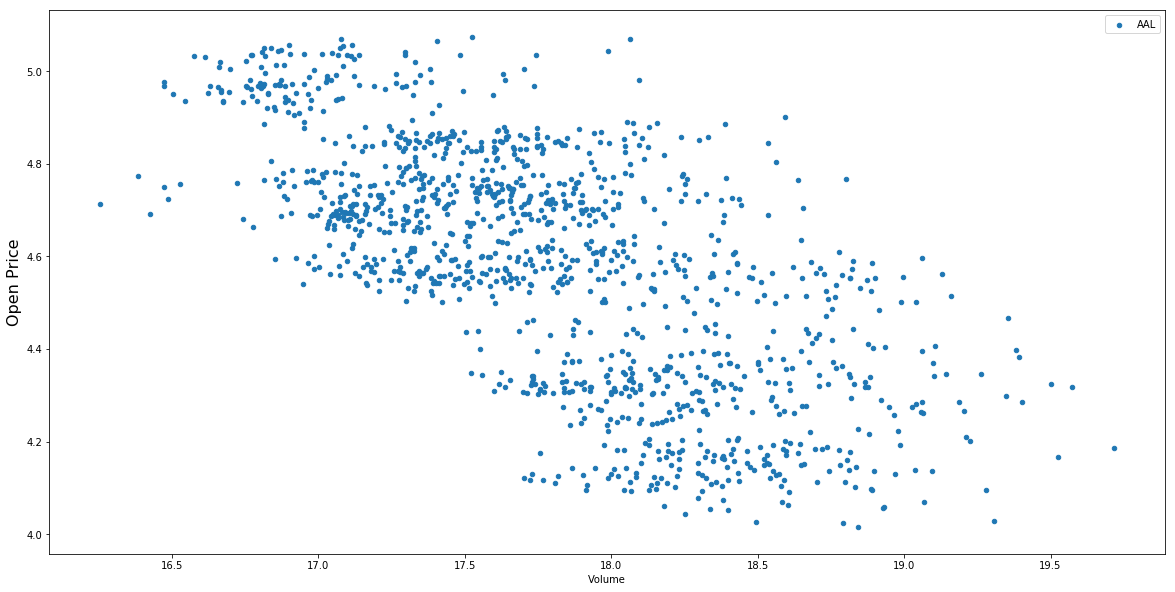

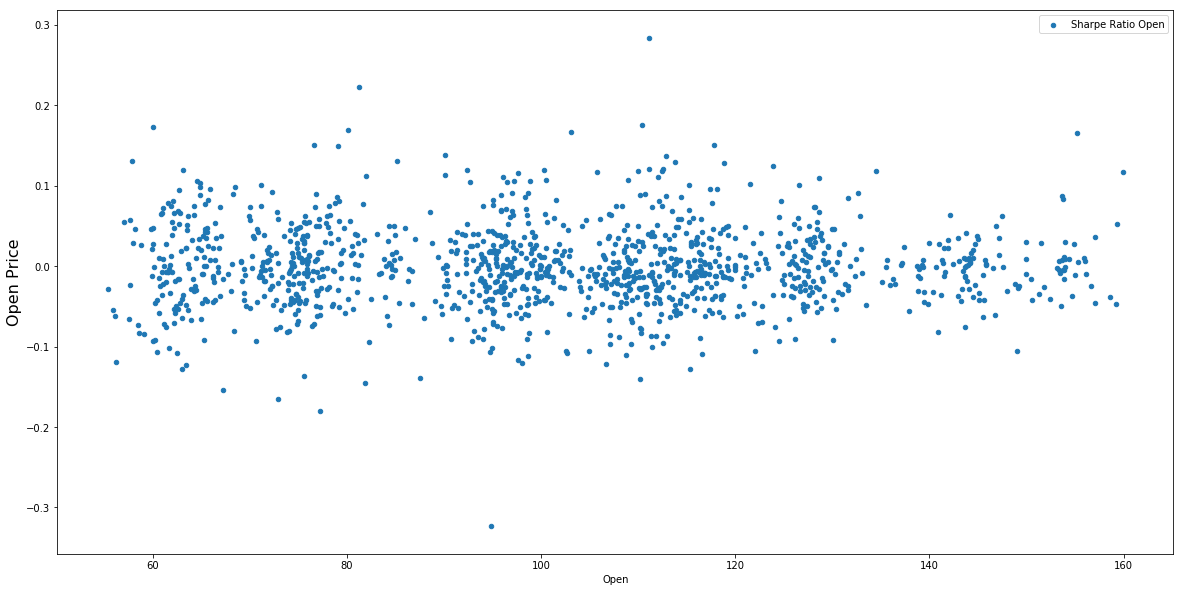

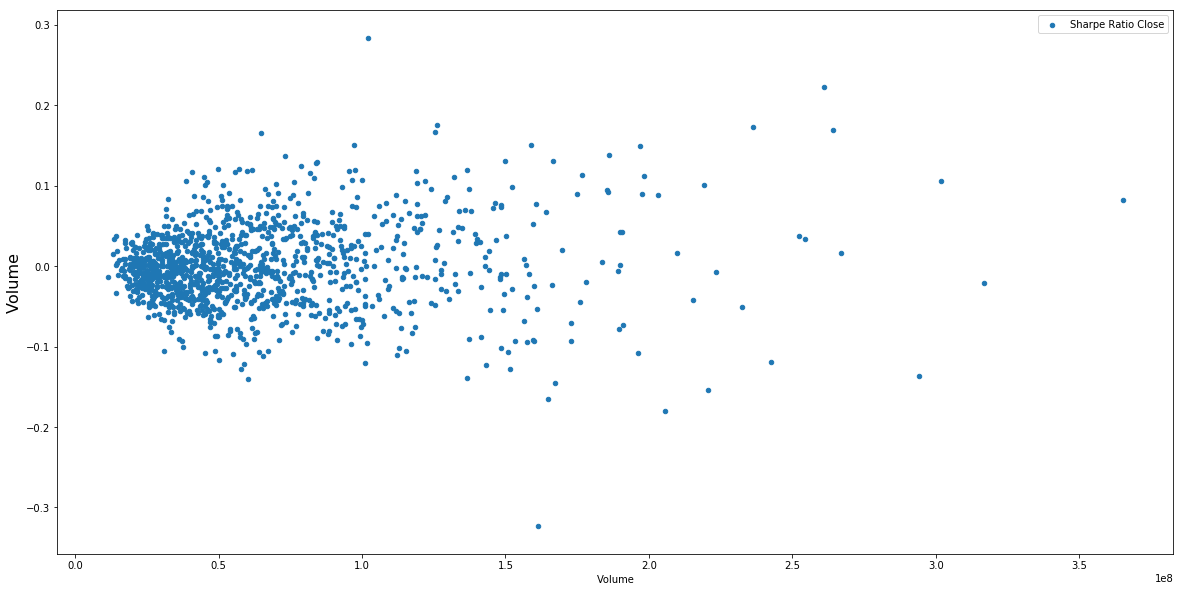

Open   High    Low  Close     Volume  Daily_Returns  \
trading_date                                                         
2012-08-13    89.06  90.00  89.04  90.00   69707463      -1.044444   
2012-08-14    90.27  91.23  90.03  90.24   85041824       0.033245   
2012-08-15    90.19  90.57  89.68  90.12   64377278       0.077674   
2012-08-16    90.17  90.97  90.07  90.91   63694204      -0.813992   
2012-08-17    91.43  92.60  91.26  92.59  110689894      -1.252835   
2012-08-20    92.86  95.02  92.84  95.02  153345689      -2.273206   
2012-08-21    95.83  96.41  92.90  93.72  203176260       2.251387   
2012-08-22    93.49  95.57  92.59  95.55  141330637      -2.155939   
2012-08-23    95.16  95.70  94.45  94.66  105029568       0.528206   
2012-08-24    94.22  95.64  93.65  94.75  109334113      -0.559367   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.043734        1.055468  
2012-08-14       -0.000512       -0.033234  
2012-08-15        0.001270       -0.077614  
2012-08-16       -0.034492        0.820672  
2012-08-17       -0.052092        1.268730  
2012-08-20       -0.093016        2.326082  
2012-08-21        0.088451       -2.201816  
2012-08-22       -0.088313        2.203444  
2012-08-23        0.019340       -0.525431  
2012-08-24       -0.024279        0.562513

AAP


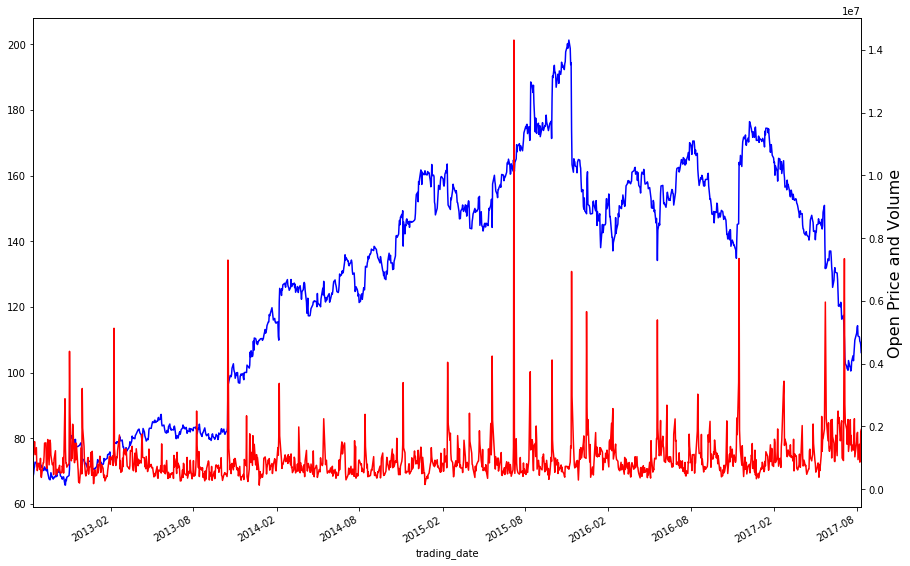

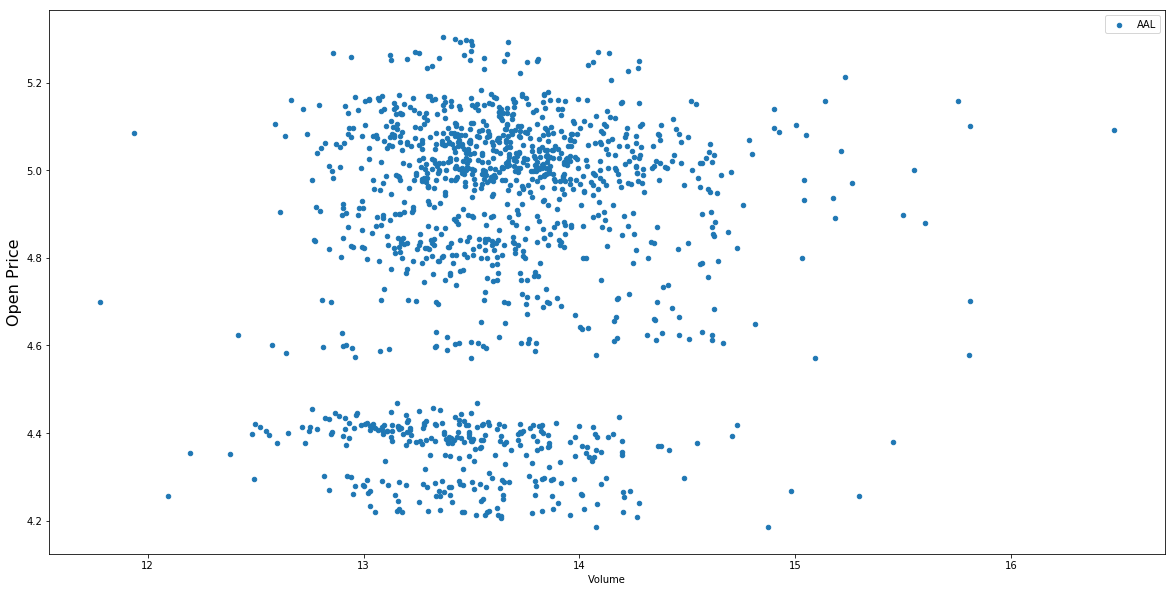

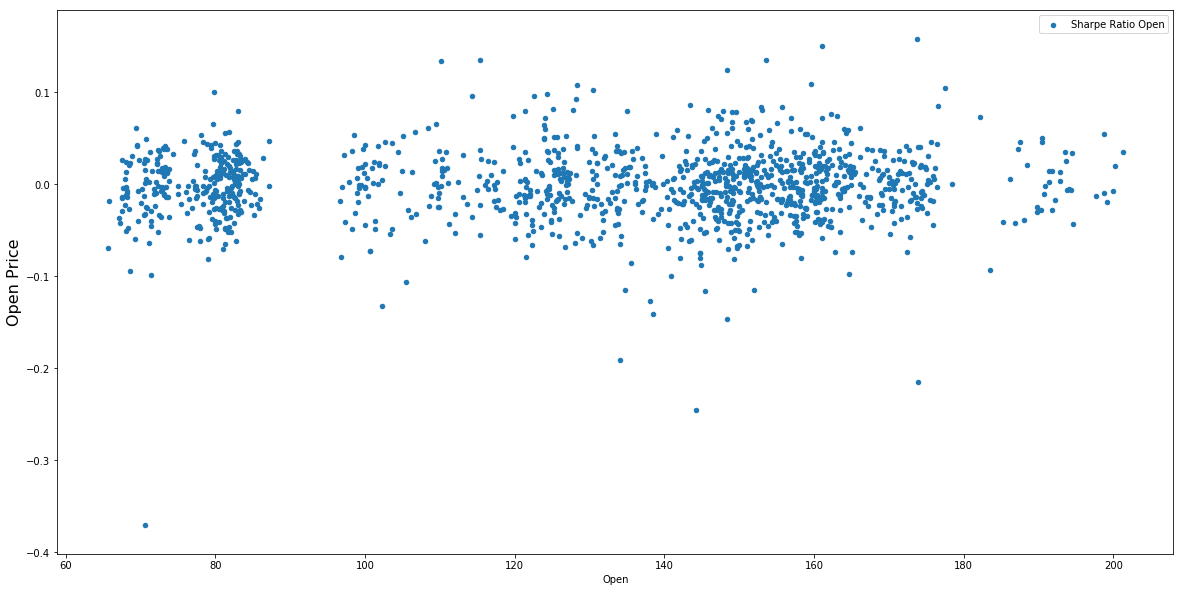

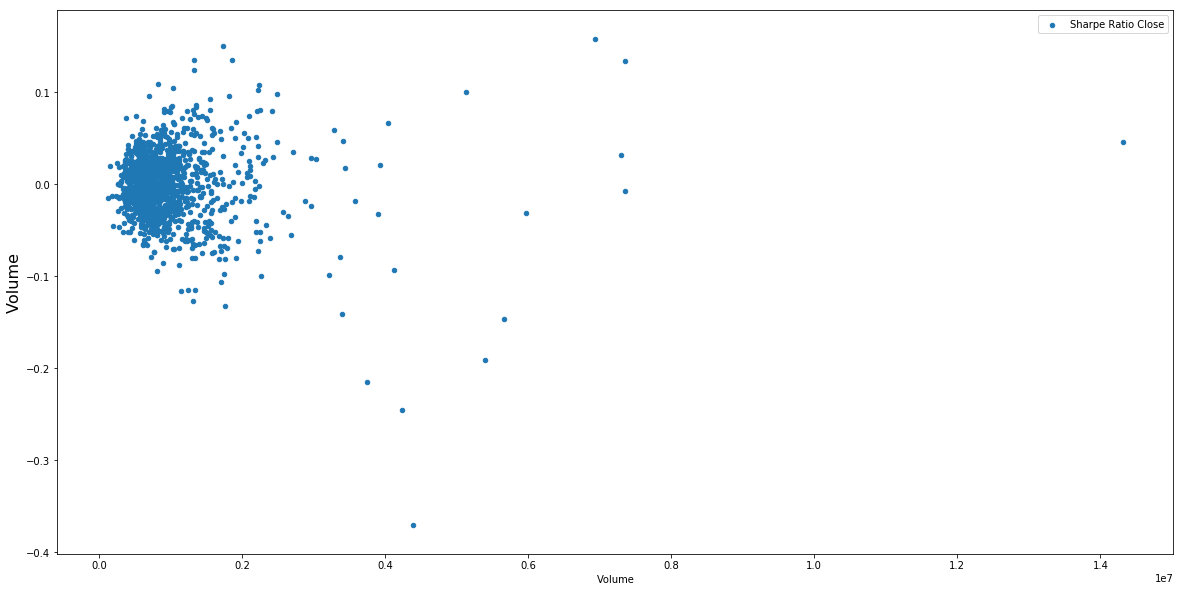

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    68.51  69.32  68.51  69.11  1063515      -0.868181   
2012-08-14    69.25  70.91  69.19  70.67  1305381      -2.009339   
2012-08-15    70.73  71.79  70.50  71.30  1217057      -0.799439   
2012-08-16    71.36  72.75  71.21  72.46  1519860      -1.518079   
2012-08-17    72.71  73.06  72.41  72.87  1102244      -0.219569   
2012-08-20    72.52  72.80  71.42  71.58  1328031       1.313216   
2012-08-21    71.76  72.07  71.36  72.00   736588      -0.333333   
2012-08-22    72.01  72.42  71.90  72.20   594173      -0.263158   
2012-08-23    72.06  72.37  71.90  71.96   657473       0.138966   
2012-08-24    71.87  72.35  71.55  71.97   830956      -0.138947   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.026412        0.875785  
2012-08-14       -0.059383        2.050542  
2012-08-15       -0.024426        0.805882  
2012-08-16       -0.045189        1.541480  
2012-08-17       -0.007673        0.220052  
2012-08-20        0.036612       -1.296194  
2012-08-21       -0.010960        0.334448  
2012-08-22       -0.008932        0.263852  
2012-08-23        0.002686       -0.138773  
2012-08-24       -0.005343        0.139140

ABBV


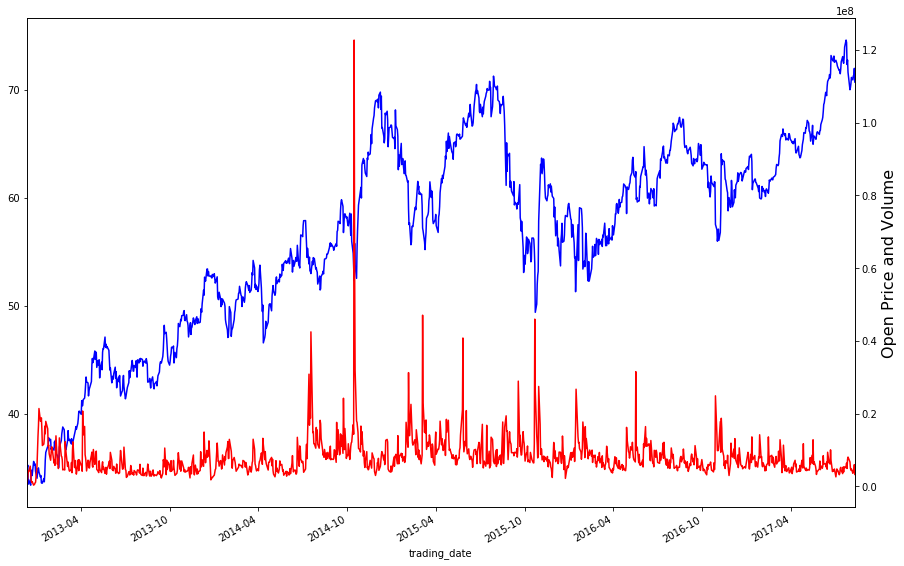

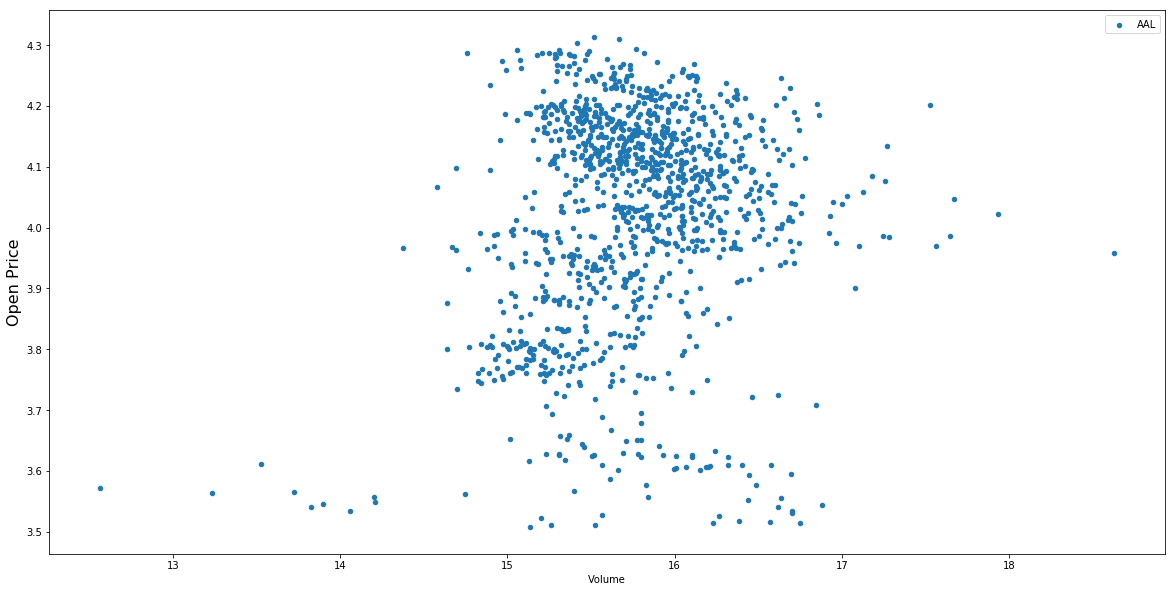

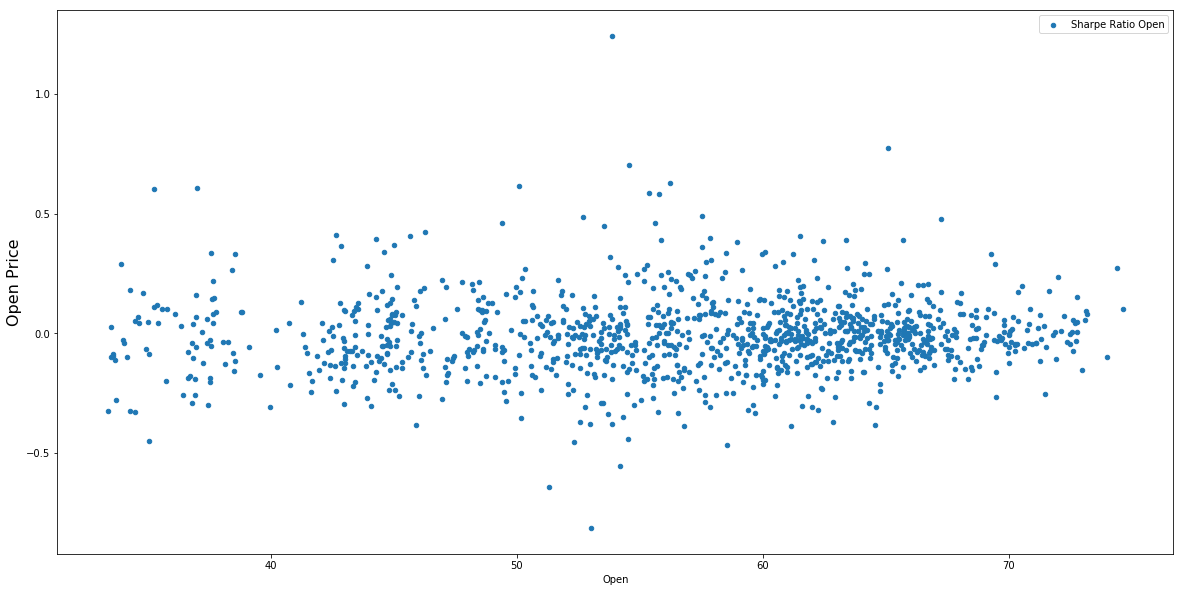

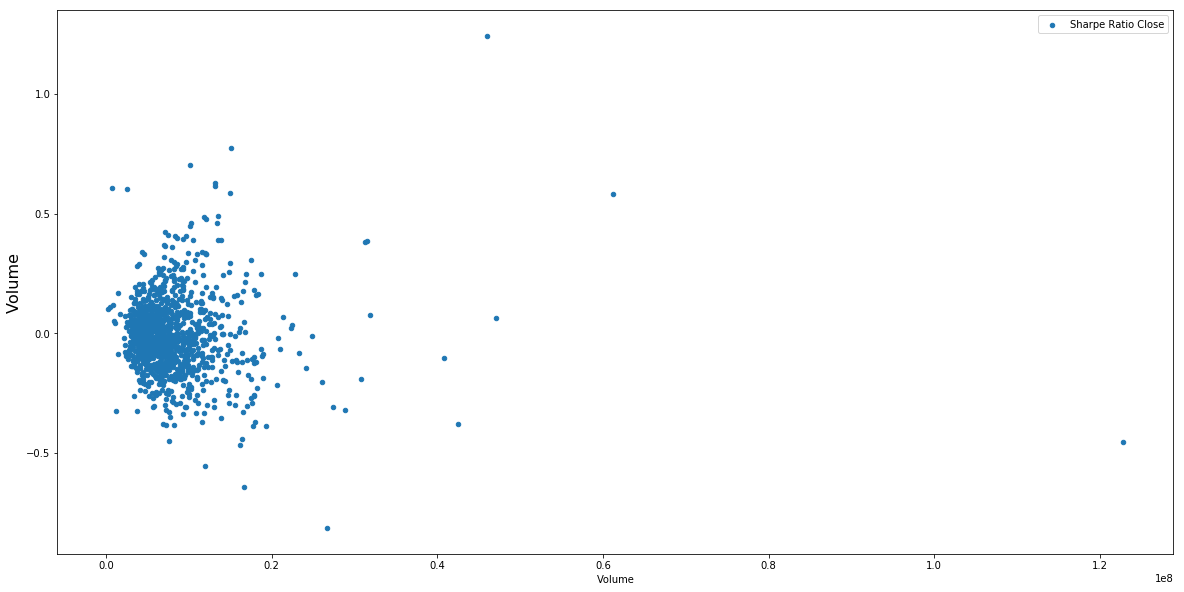

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-12-10    37.00  37.00  34.91  35.00   749378       5.714286   
2012-12-11    35.05  35.69  34.95  35.32  1472086      -0.764439   
2012-12-12    35.25  35.25  33.09  33.36  2530442       5.665468   
2012-12-13    33.50  34.24  32.61  33.80  4253303      -0.887574   
2012-12-14    33.90  34.08  32.65  33.00  4006673       2.727273   
2012-12-17    33.50  37.07  32.51  33.40  5516963       0.299401   
2012-12-18    33.40  34.68  32.95  34.43  3740536      -2.991577   
2012-12-19    34.80  34.82  33.73  34.25  1480328       1.605839   
2012-12-20    34.50  34.50  33.85  34.32  1010326       0.524476   
2012-12-21    34.29  35.35  34.20  35.35  1276538      -2.998586   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-12-10        0.608600       -5.405405  
2012-12-11       -0.087016        0.770328  
2012-12-12        0.603359       -5.361702  
2012-12-13       -0.100237        0.895522  
2012-12-14        0.287887       -2.654867  
2012-12-17        0.027208       -0.298507  
2012-12-18       -0.326143        3.083832  
2012-12-19        0.167479       -1.580460  
2012-12-20        0.051374       -0.521739  
2012-12-21       -0.326895        3.091280

ABC


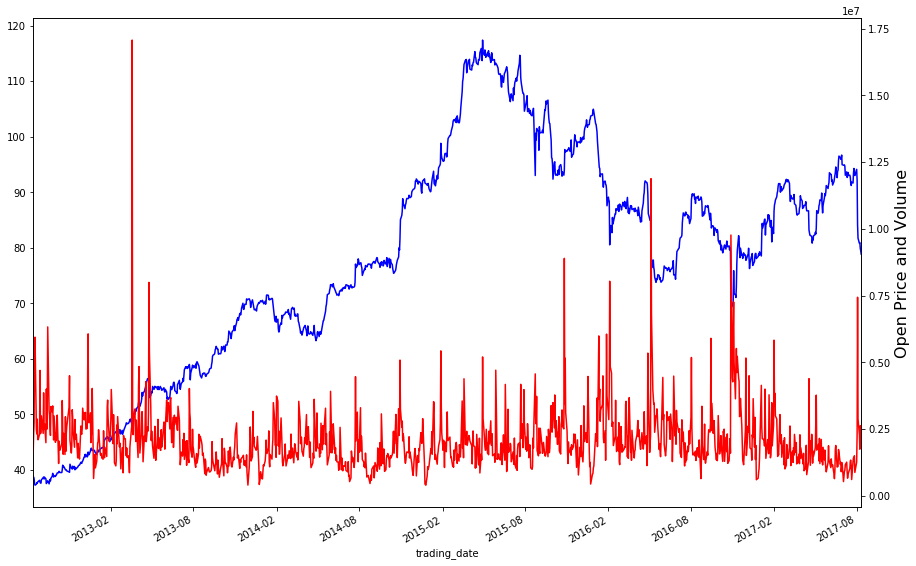

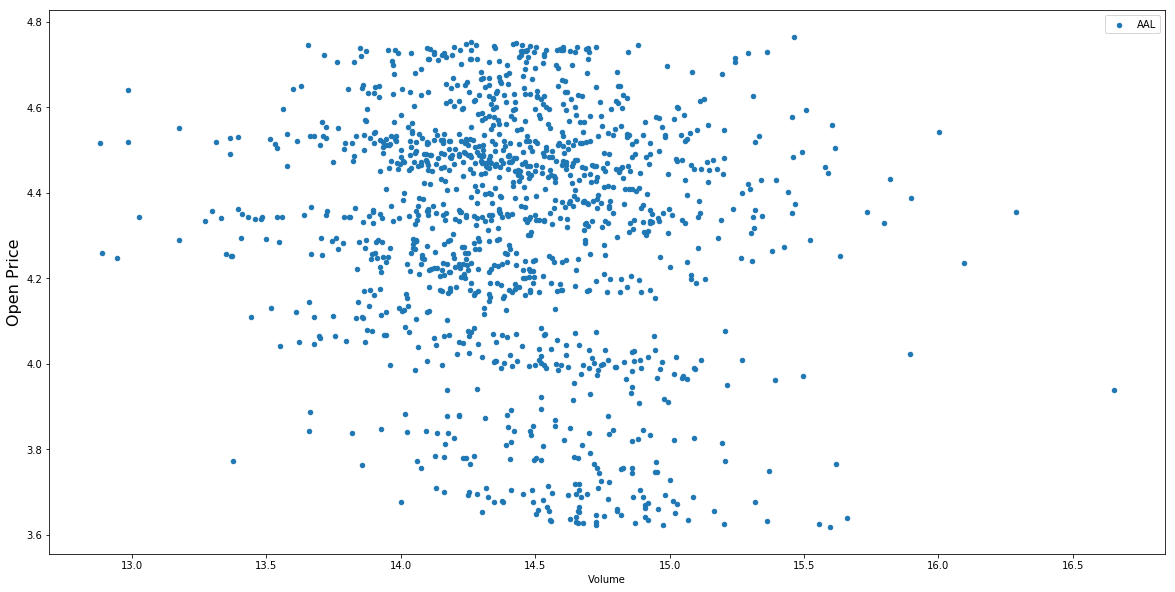

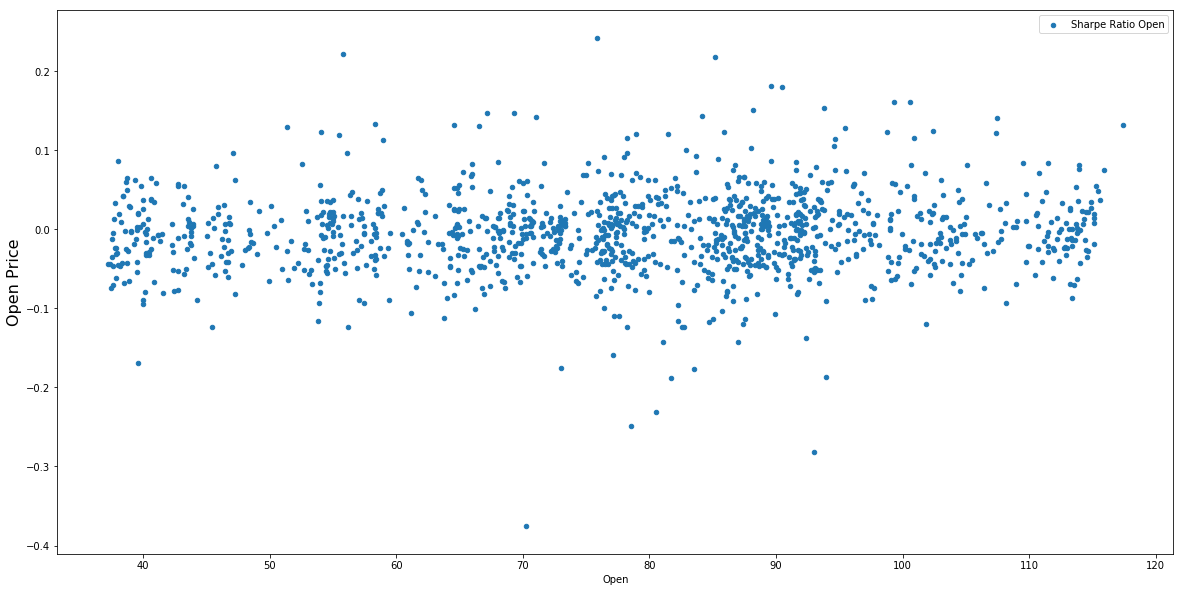

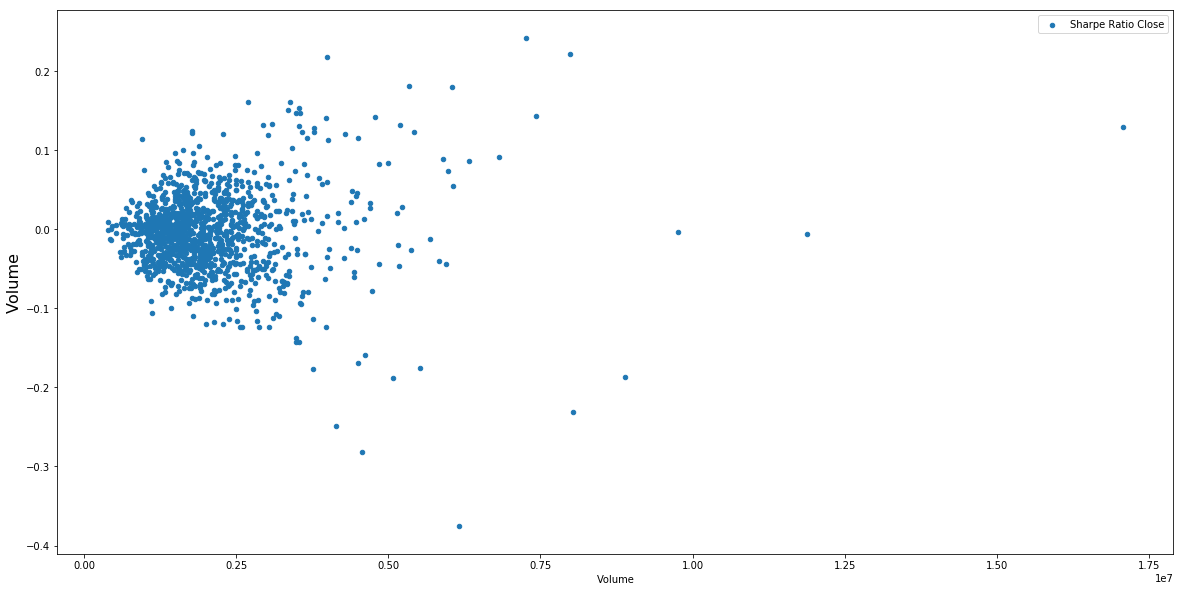

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    38.59  38.69  38.14  38.59  1628811       0.000000   
2012-08-14    38.69  38.77  38.18  38.29  2322891       1.044659   
2012-08-15    38.36  38.51  37.93  38.02  2724787       0.894266   
2012-08-16    37.51  37.70  37.17  37.58  5691501      -0.186269   
2012-08-17    37.23  37.74  36.91  37.54  5939986      -0.825786   
2012-08-20    37.40  37.82  37.38  37.71  2482356      -0.822063   
2012-08-21    37.68  38.06  37.50  37.56  2310706       0.319489   
2012-08-22    37.58  38.07  37.42  37.92  2870572      -0.896624   
2012-08-23    37.82  38.15  37.76  37.98  2100756      -0.421274   
2012-08-24    37.89  38.26  37.82  38.10  2098671      -0.551181   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.002289        0.000000  
2012-08-14        0.049701       -1.033859  
2012-08-15        0.042217       -0.886340  
2012-08-16       -0.011560        0.186617  
2012-08-17       -0.043387        0.832662  
2012-08-20       -0.043202        0.828877  
2012-08-21        0.013611       -0.318471  
2012-08-22       -0.046913        0.904737  
2012-08-23       -0.023255        0.423057  
2012-08-24       -0.029721        0.554236

ABT


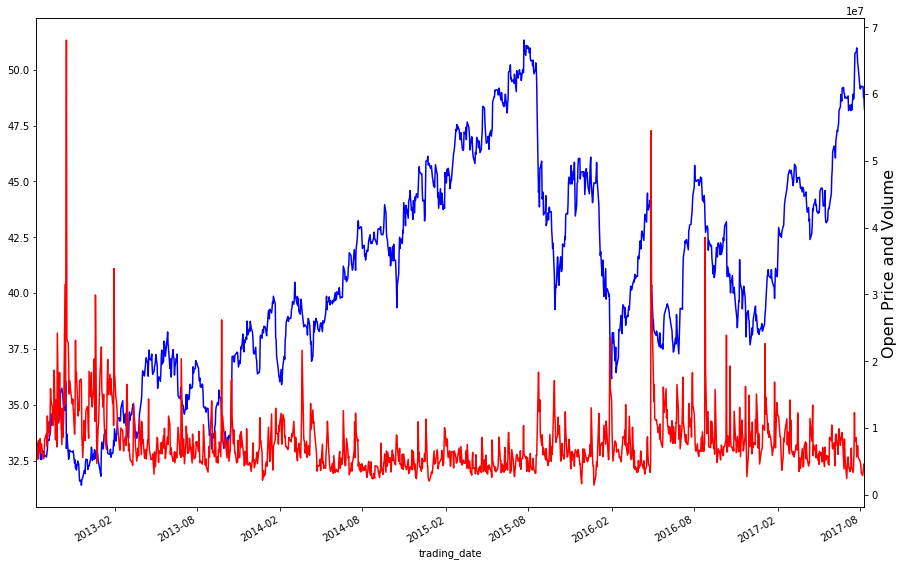

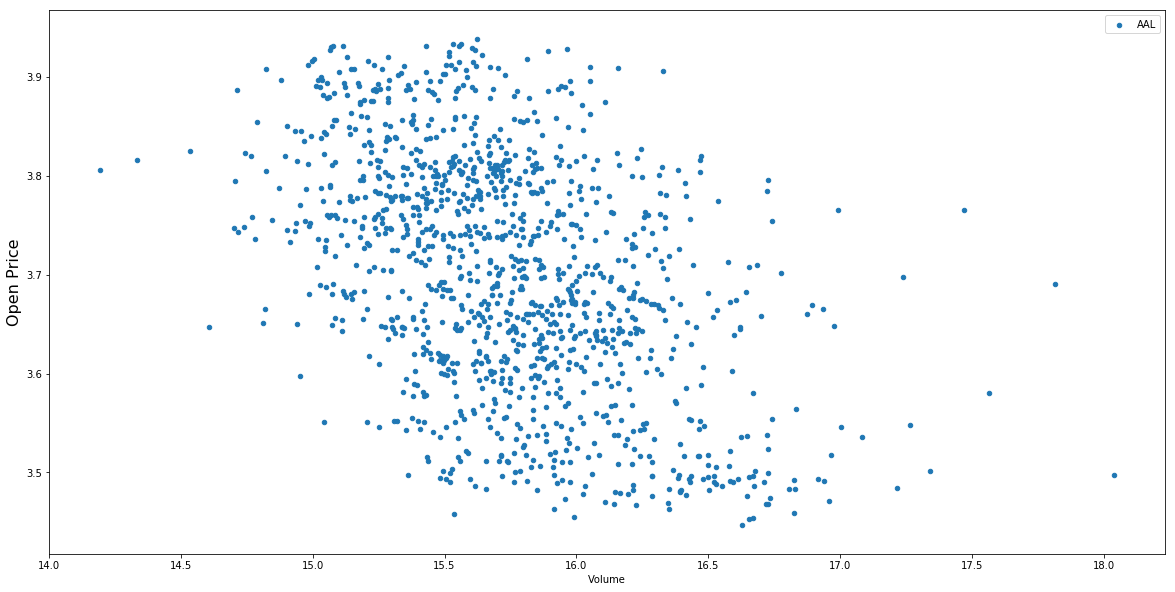

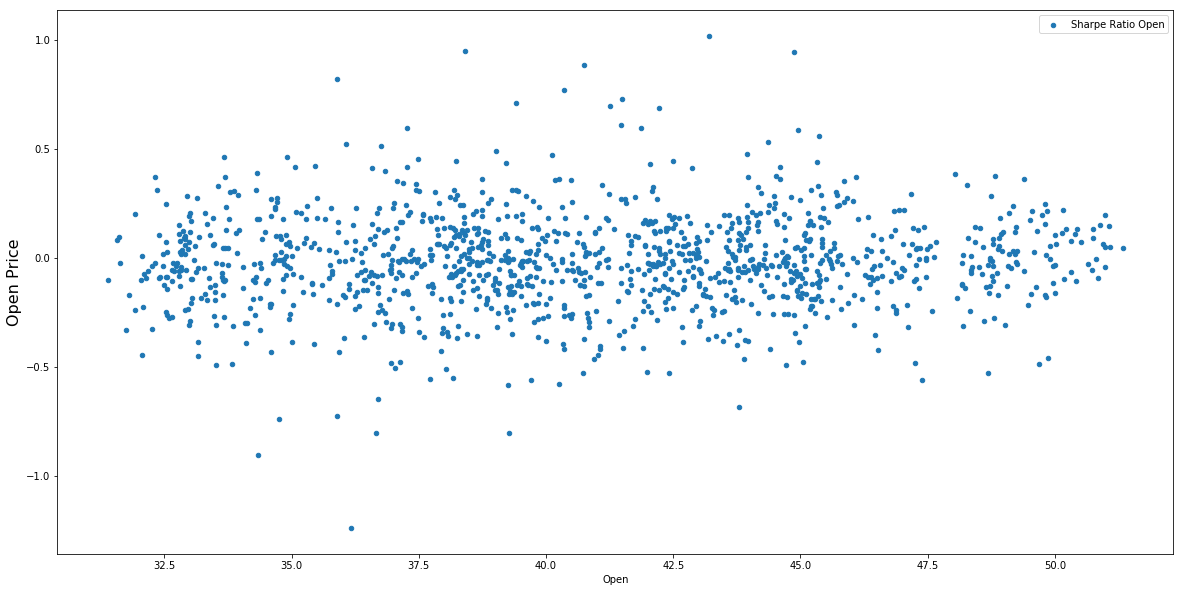

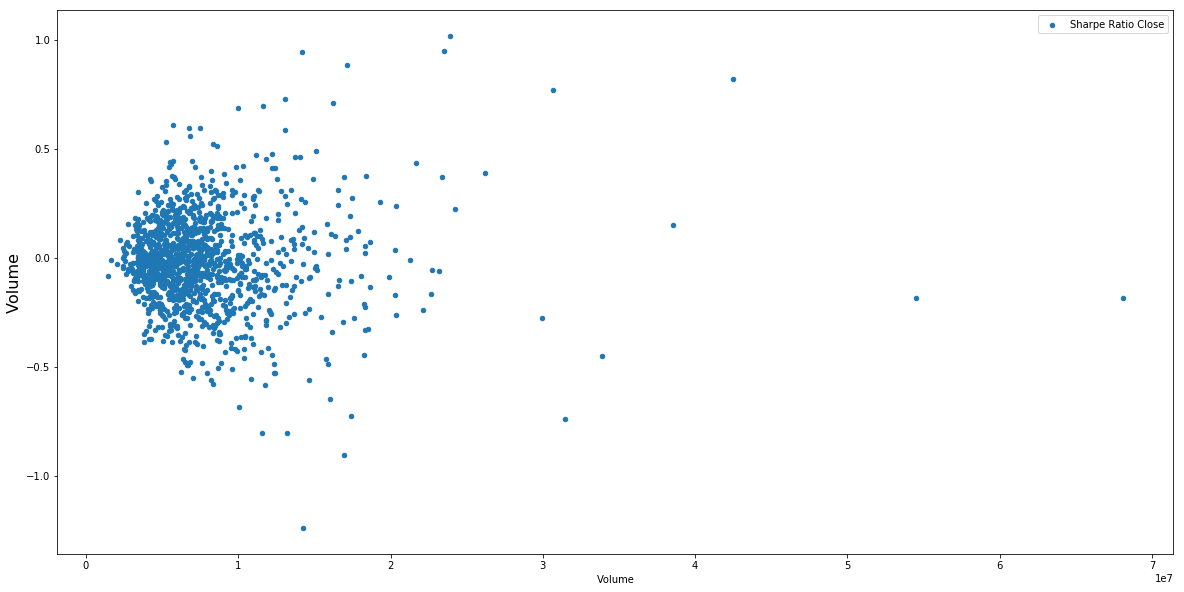

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    32.93  33.02  32.84  33.00  5290056      -0.212121   
2012-08-14    33.08  33.14  32.95  33.08  5499012       0.000000   
2012-08-15    33.12  33.34  33.04  33.21  7044866      -0.271003   
2012-08-16    33.16  33.25  33.00  33.22  5353566      -0.180614   
2012-08-17    33.30  33.30  32.84  32.96  8122218       1.031553   
2012-08-20    32.99  33.05  32.84  32.86  6692920       0.395618   
2012-08-21    32.86  32.98  32.62  32.65  8420758       0.643185   
2012-08-22    32.56  32.86  32.54  32.77  6312514      -0.640830   
2012-08-23    32.80  32.89  32.57  32.66  7002542       0.428659   
2012-08-24    32.54  32.95  32.54  32.92  7649672      -1.154313   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.053541        0.212572  
2012-08-14       -0.009542        0.000000  
2012-08-15       -0.065755        0.271739  
2012-08-16       -0.047006        0.180941  
2012-08-17        0.204431       -1.021021  
2012-08-20        0.072520       -0.394059  
2012-08-21        0.123872       -0.639075  
2012-08-22       -0.142467        0.644963  
2012-08-23        0.079374       -0.426829  
2012-08-24       -0.248978        1.167793

ACN


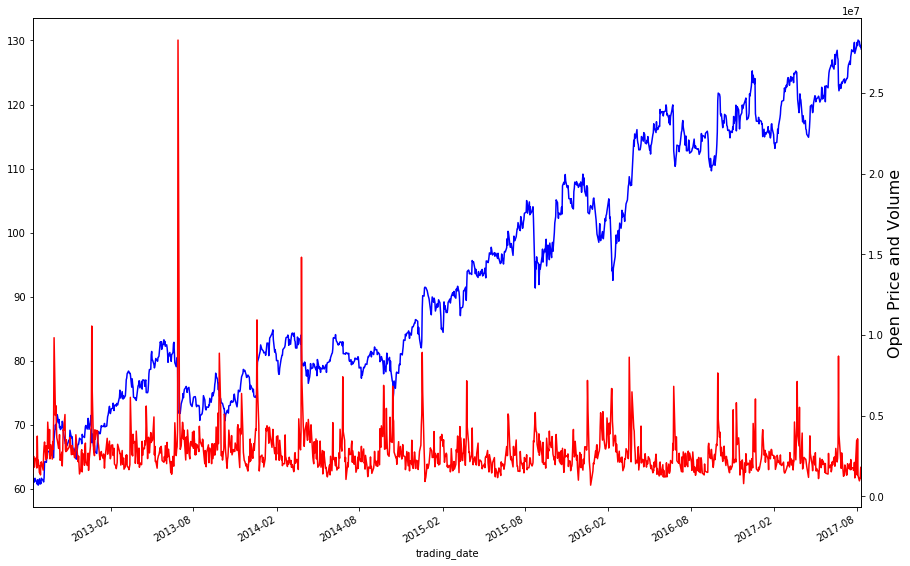

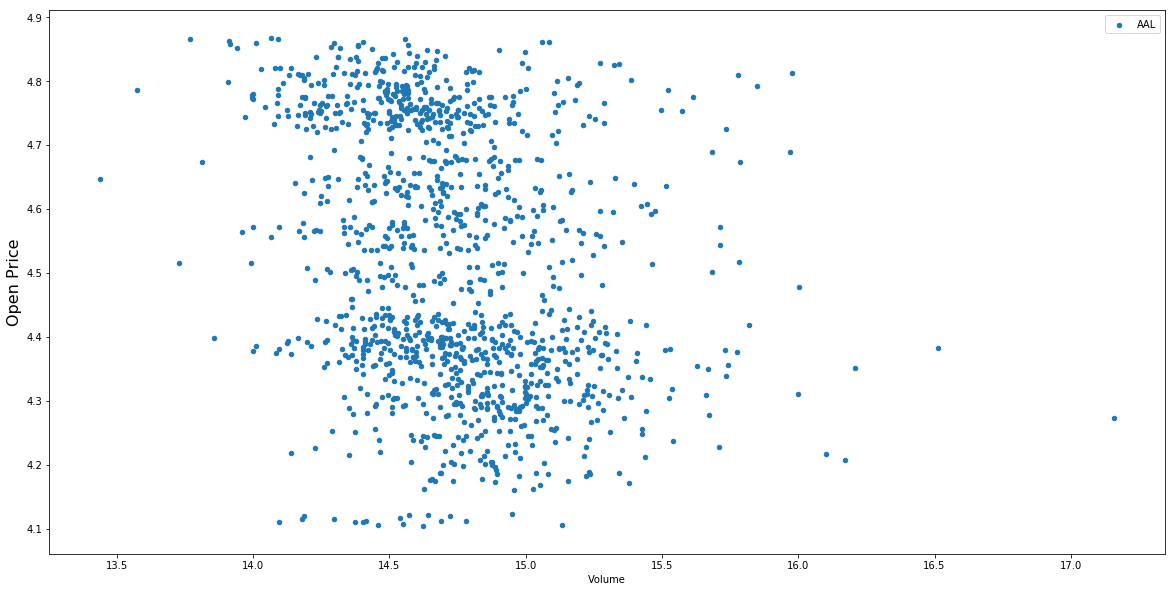

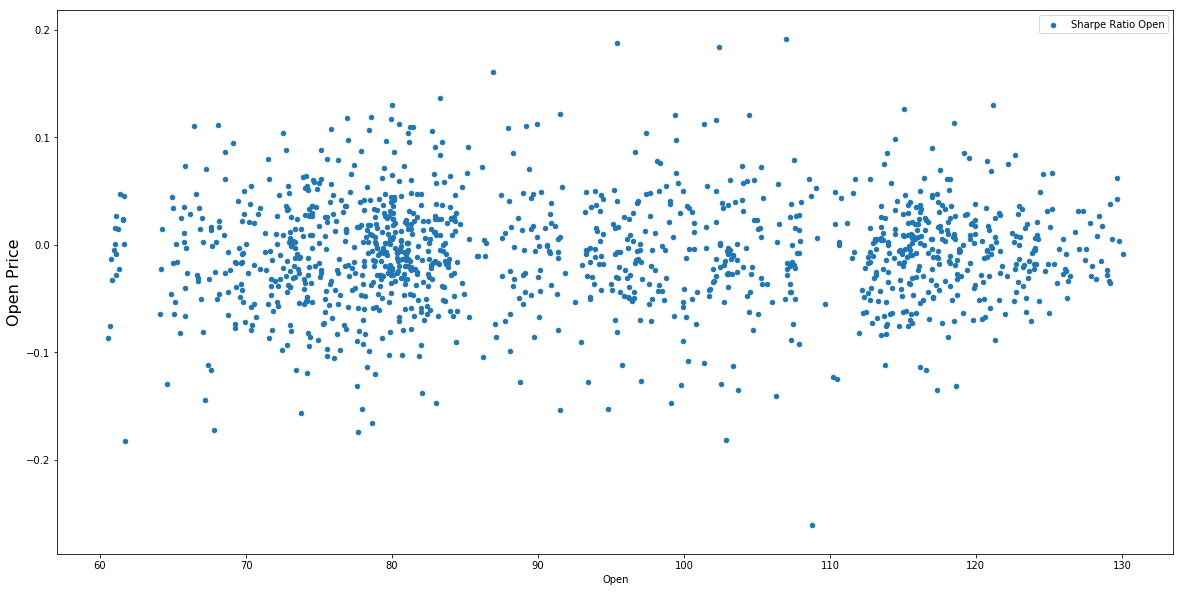

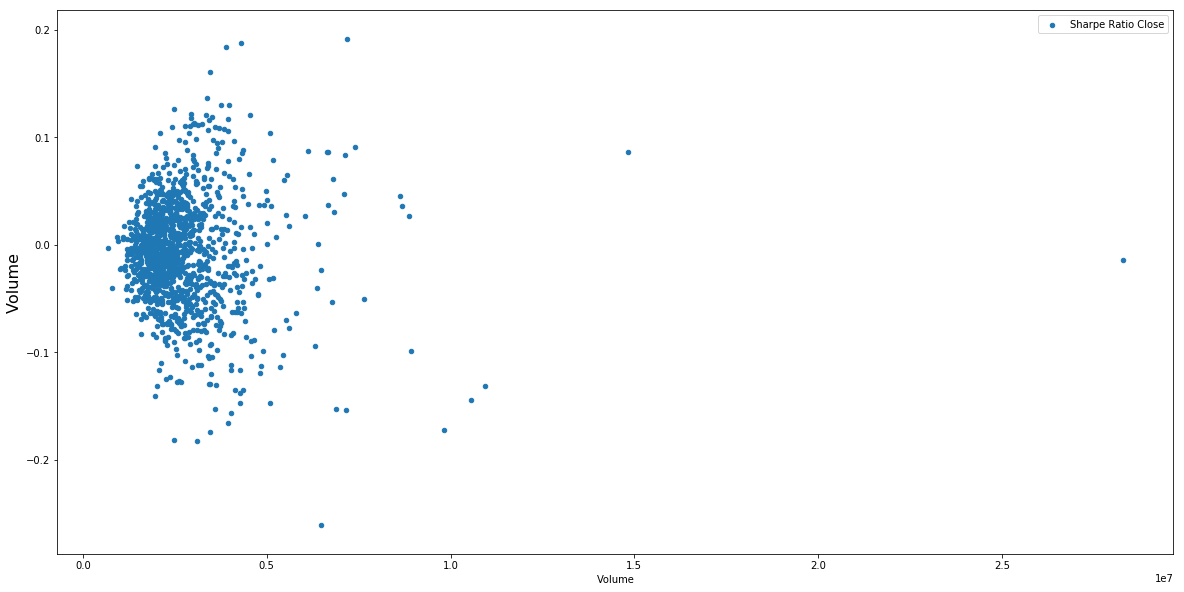

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    61.27  61.55  60.94  61.50  1436939      -0.373984   
2012-08-14    61.55  61.63  61.05  61.26  2479628       0.473392   
2012-08-15    61.03  61.46  60.68  60.82  1801610       0.345281   
2012-08-16    61.08  61.37  60.56  61.15  1816897      -0.114473   
2012-08-17    61.63  61.98  61.02  61.08  2280824       0.900458   
2012-08-20    61.12  61.28  60.68  60.79  2396342       0.542852   
2012-08-21    61.02  61.36  60.74  60.98  1749846       0.065595   
2012-08-22    60.71  61.96  60.55  61.55  3729681      -1.364744   
2012-08-23    61.40  61.49  60.64  60.83  2059817       0.937038   
2012-08-24    60.56  61.64  60.41  61.53  2238286      -1.576467   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.022464        0.375388  
2012-08-14        0.022860       -0.471162  
2012-08-15        0.016008       -0.344093  
2012-08-16       -0.008583        0.114604  
2012-08-17        0.045703       -0.892423  
2012-08-20        0.026576       -0.539921  
2012-08-21        0.001048       -0.065552  
2012-08-22       -0.075458        1.383627  
2012-08-23        0.047660       -0.928339  
2012-08-24       -0.086783        1.601717

ADBE


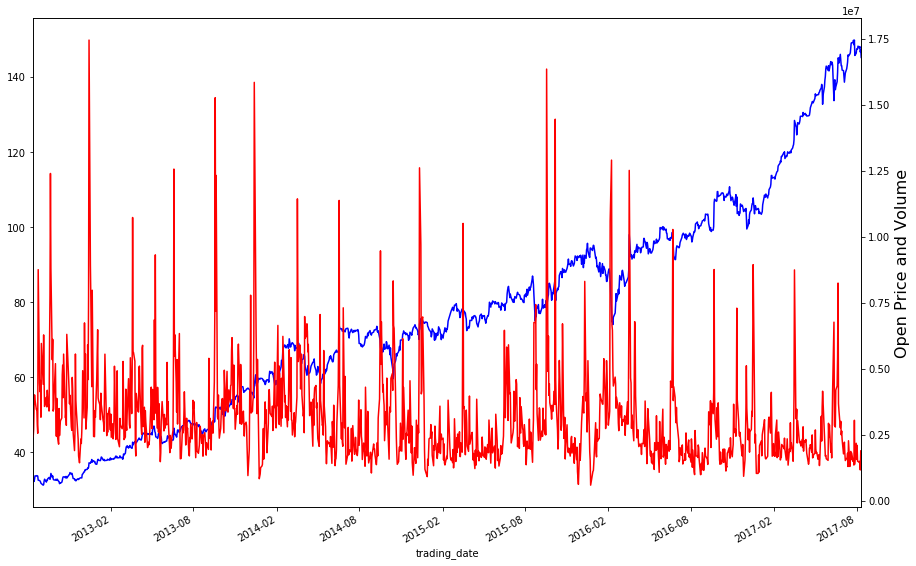

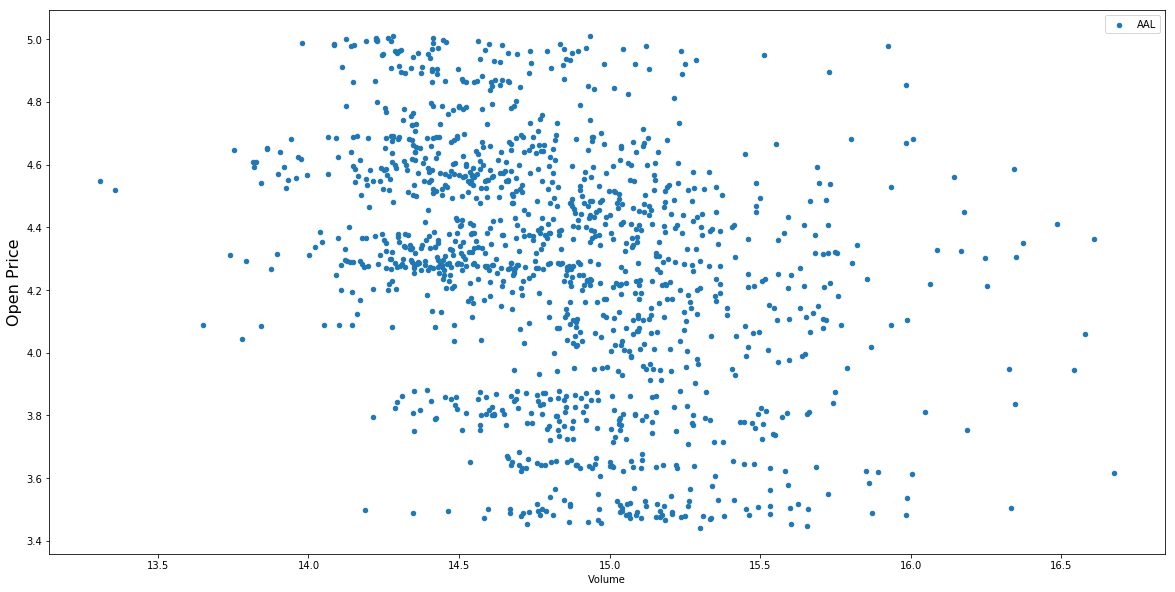

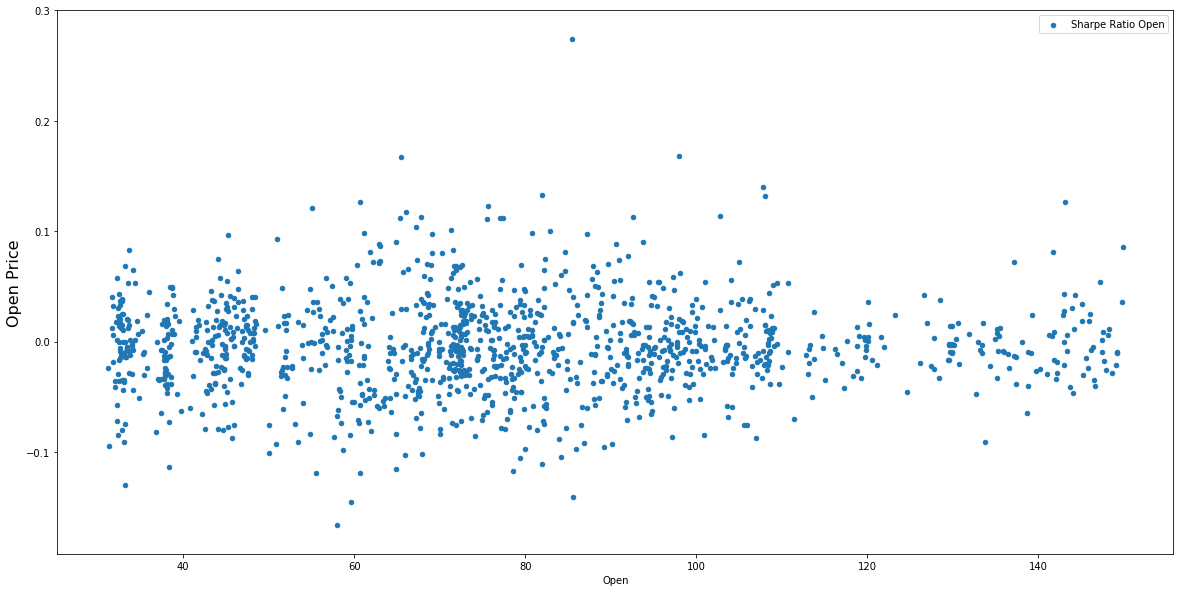

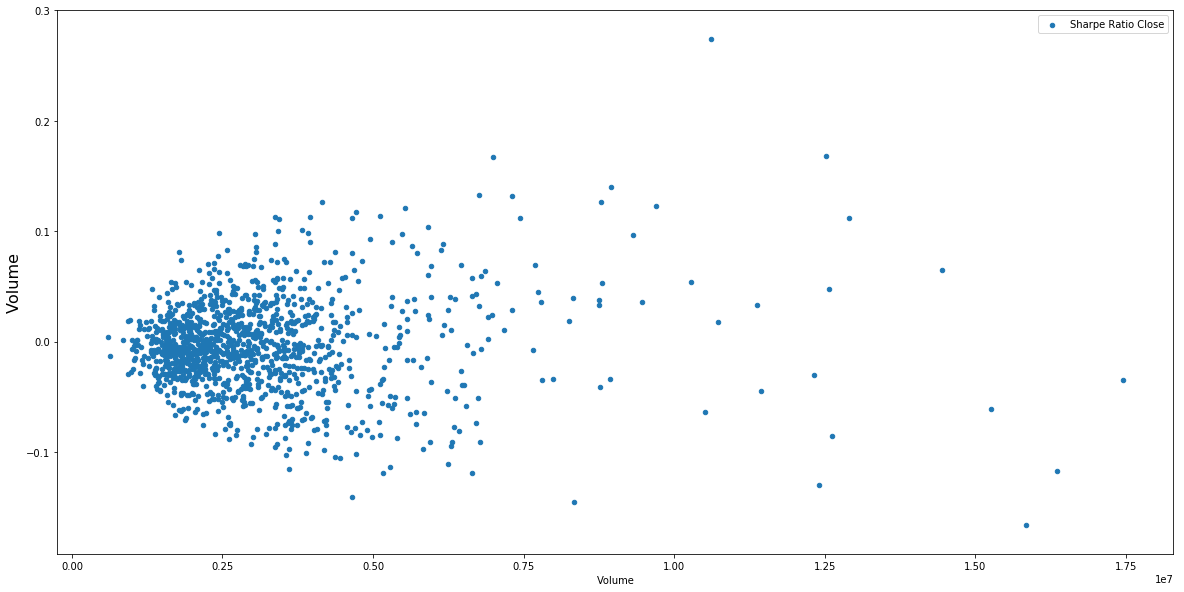

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    32.48  32.55  32.09  32.27  2433874       0.650759   
2012-08-14    32.51  32.55  32.00  32.10  2712416       1.277259   
2012-08-15    32.24  32.95  32.12  32.91  3632930      -2.035855   
2012-08-16    32.89  33.72  32.87  33.65  4019964      -2.258544   
2012-08-17    33.73  33.91  33.42  33.80  3822902      -0.207101   
2012-08-20    33.66  33.94  33.36  33.92  3464944      -0.766509   
2012-08-21    33.78  34.09  33.60  33.75  3493177       0.088889   
2012-08-22    33.74  33.98  33.62  33.84  2870912      -0.295508   
2012-08-23    33.66  33.80  33.34  33.50  2566667       0.477612   
2012-08-24    32.58  32.58  31.83  32.26  8759571       0.991940   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13        0.020926       -0.646552  
2012-08-14        0.042605       -1.261150  
2012-08-15       -0.072037        2.078164  
2012-08-16       -0.079743        2.310733  
2012-08-17       -0.008758        0.207530  
2012-08-20       -0.028115        0.772430  
2012-08-21        0.001484       -0.088810  
2012-08-22       -0.011817        0.296384  
2012-08-23        0.014935       -0.475342  
2012-08-24        0.032732       -0.982198

ADI


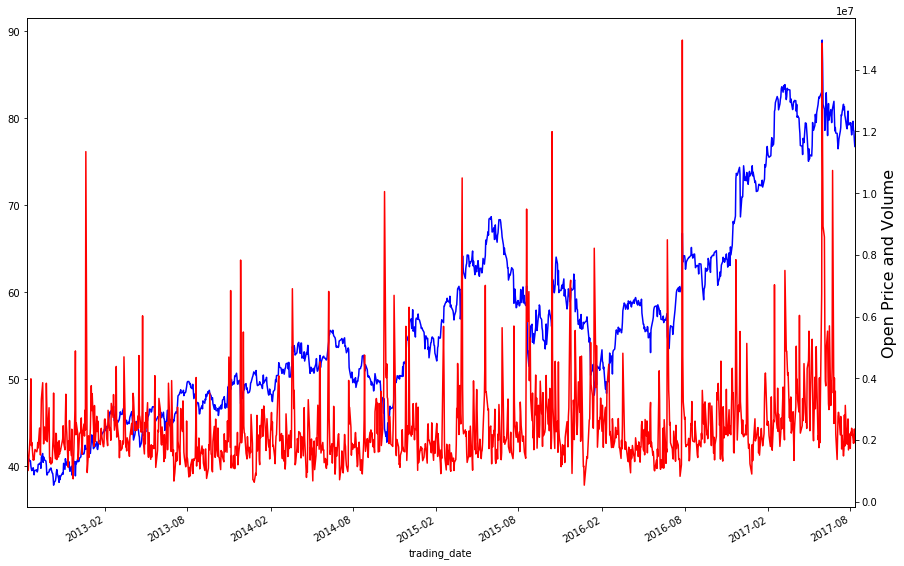

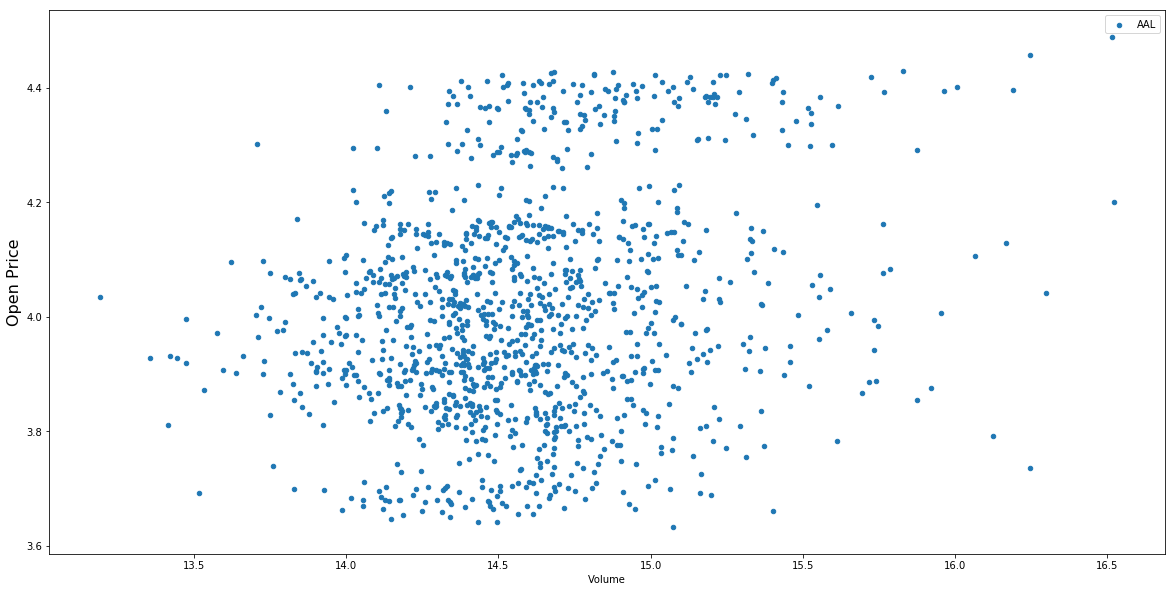

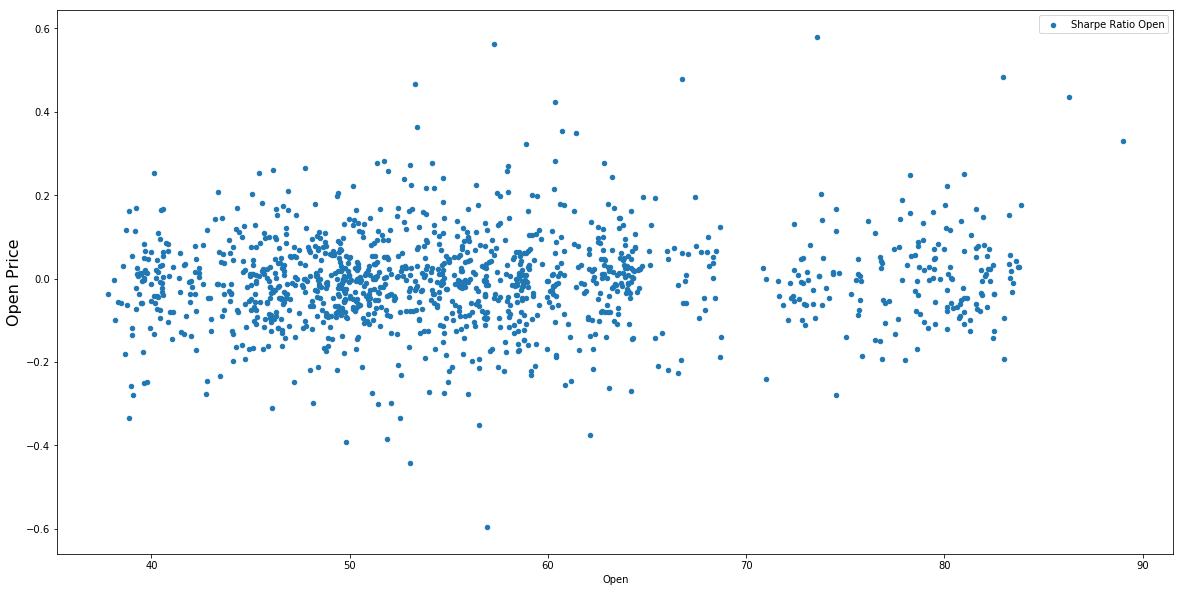

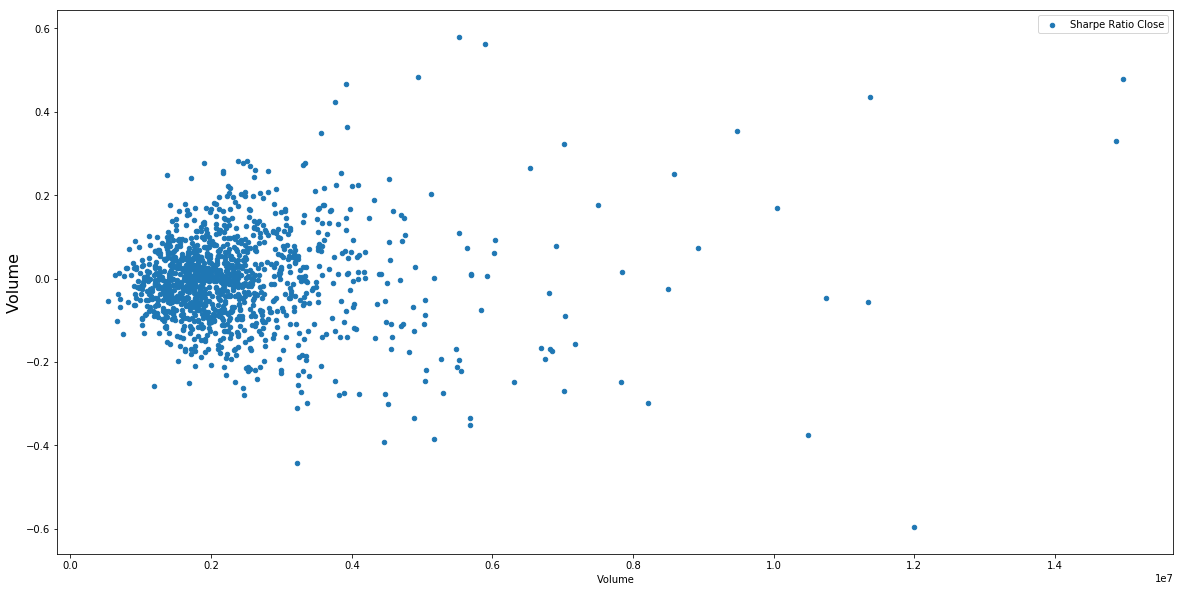

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    40.35  40.53  40.04  40.53  1654115      -0.444115   
2012-08-14    40.59  40.72  40.12  40.28  1676093       0.769613   
2012-08-15    40.26  40.72  40.21  40.43  1338791      -0.420480   
2012-08-16    40.43  40.91  40.40  40.85  1011580      -1.028152   
2012-08-17    40.87  40.89  40.45  40.82  1274978       0.122489   
2012-08-20    40.58  40.75  40.24  40.54  2074533       0.098668   
2012-08-21    40.60  40.80  40.20  40.34  3241219       0.644522   
2012-08-22    40.00  40.20  39.42  39.70  3983186       0.755668   
2012-08-23    39.68  39.75  39.25  39.57  1820002       0.277988   
2012-08-24    39.49  39.92  39.32  39.74  1920080      -0.629089   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.043425        0.446097  
2012-08-14        0.064114       -0.763735  
2012-08-15       -0.041331        0.422255  
2012-08-16       -0.095172        1.038833  
2012-08-17        0.006777       -0.122339  
2012-08-20        0.004666       -0.098571  
2012-08-21        0.053030       -0.640394  
2012-08-22        0.062878       -0.750000  
2012-08-23        0.020555       -0.277218  
2012-08-24       -0.059814        0.633072

ADM


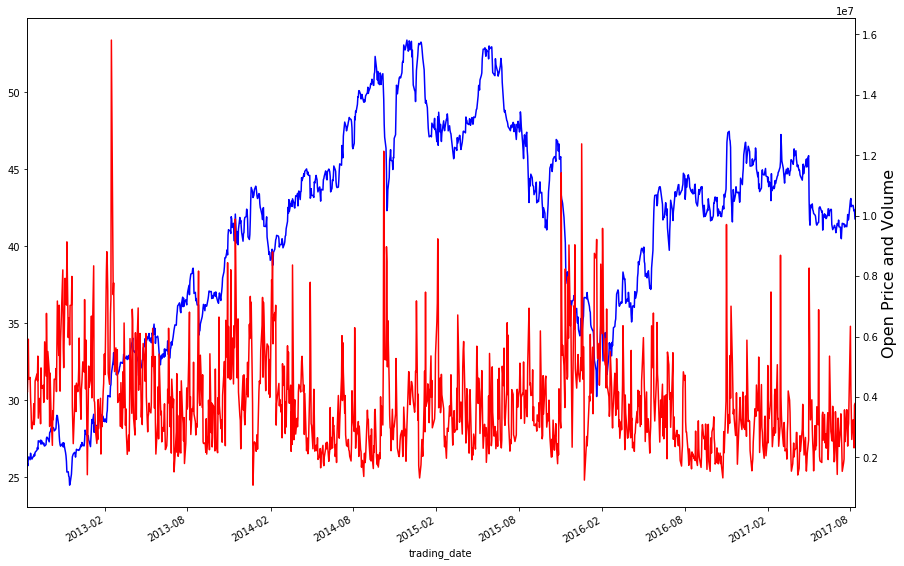

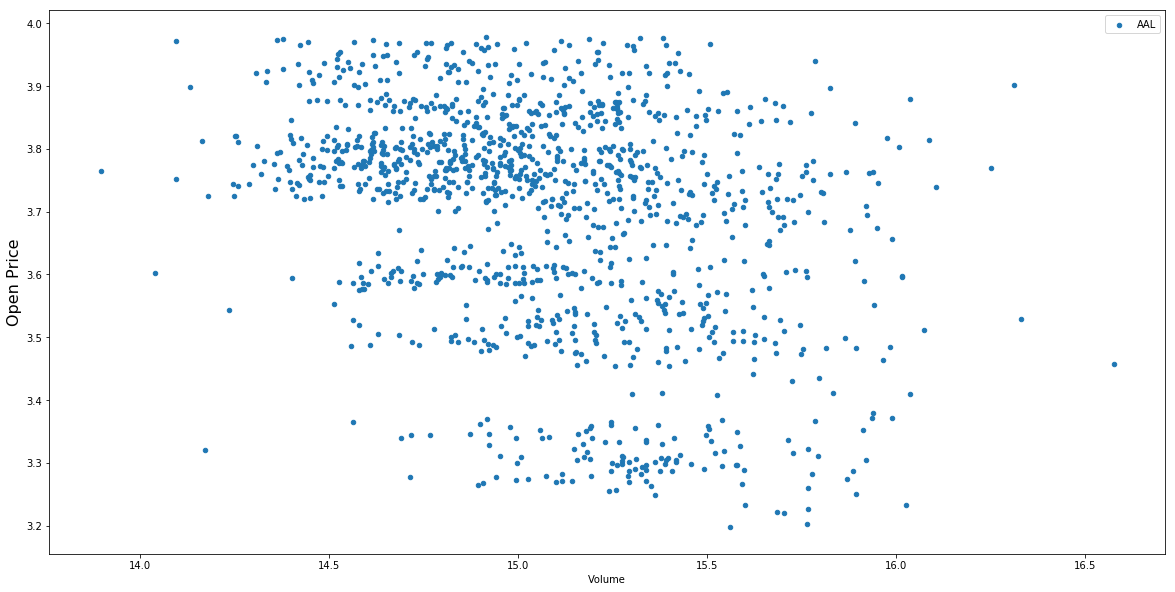

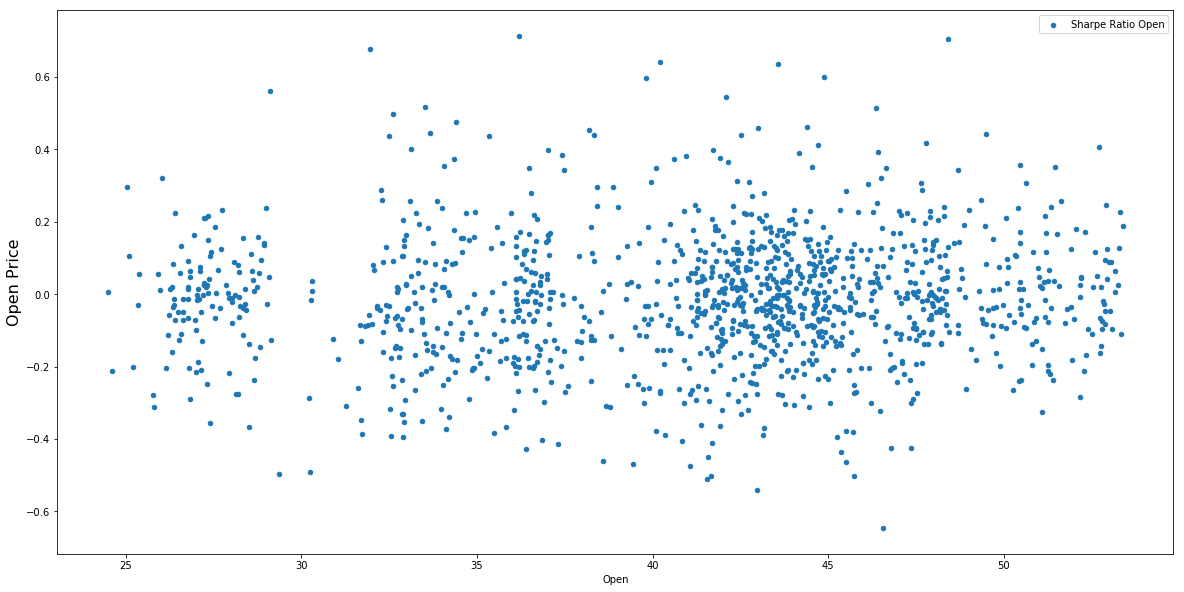

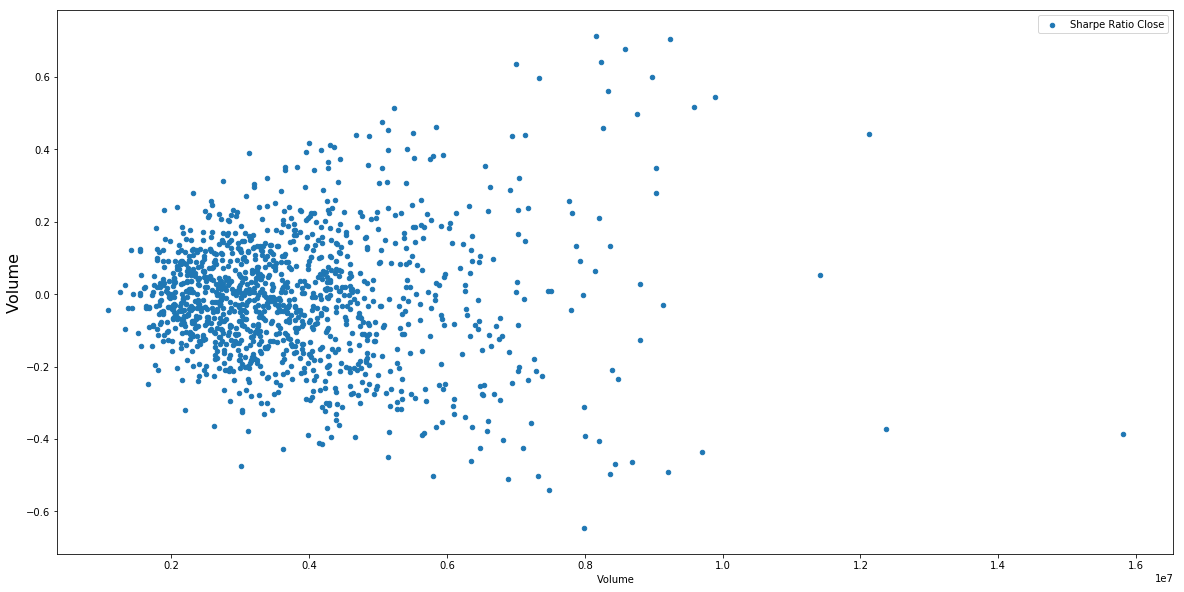

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    25.96  26.19  25.90  25.93  4240173       0.115696   
2012-08-14    25.93  25.95  25.63  25.82  4161263       0.426026   
2012-08-15    25.76  26.34  25.66  26.25  4704930      -1.866667   
2012-08-16    26.23  26.46  26.13  26.32  5912830      -0.341945   
2012-08-17    26.33  26.41  26.08  26.17  4588910       0.611387   
2012-08-20    26.15  26.56  26.06  26.51  4647239      -1.357978   
2012-08-21    26.57  26.77  26.27  26.32  3967510       0.949848   
2012-08-22    26.32  26.40  26.10  26.27  3619702       0.190331   
2012-08-23    26.25  26.32  26.13  26.21  2981630       0.152614   
2012-08-24    26.19  26.44  26.00  26.38  2942024      -0.720243   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13        0.010164       -0.115562  
2012-08-14        0.055420       -0.424219  
2012-08-15       -0.278928        1.902174  
2012-08-16       -0.056575        0.343119  
2012-08-17        0.082451       -0.607672  
2012-08-20       -0.204745        1.376673  
2012-08-21        0.131810       -0.940911  
2012-08-22        0.021048       -0.189970  
2012-08-23        0.015548       -0.152381  
2012-08-24       -0.111743        0.725468

ADP


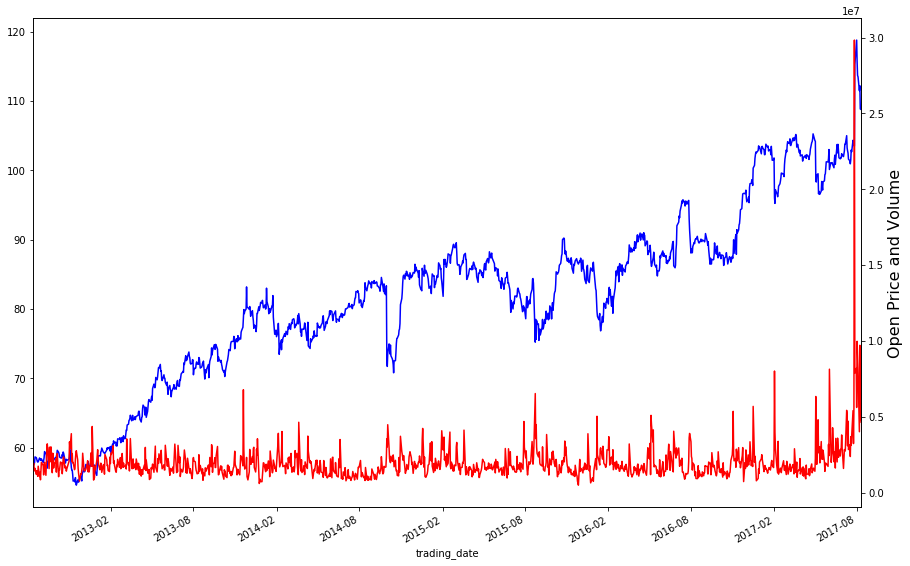

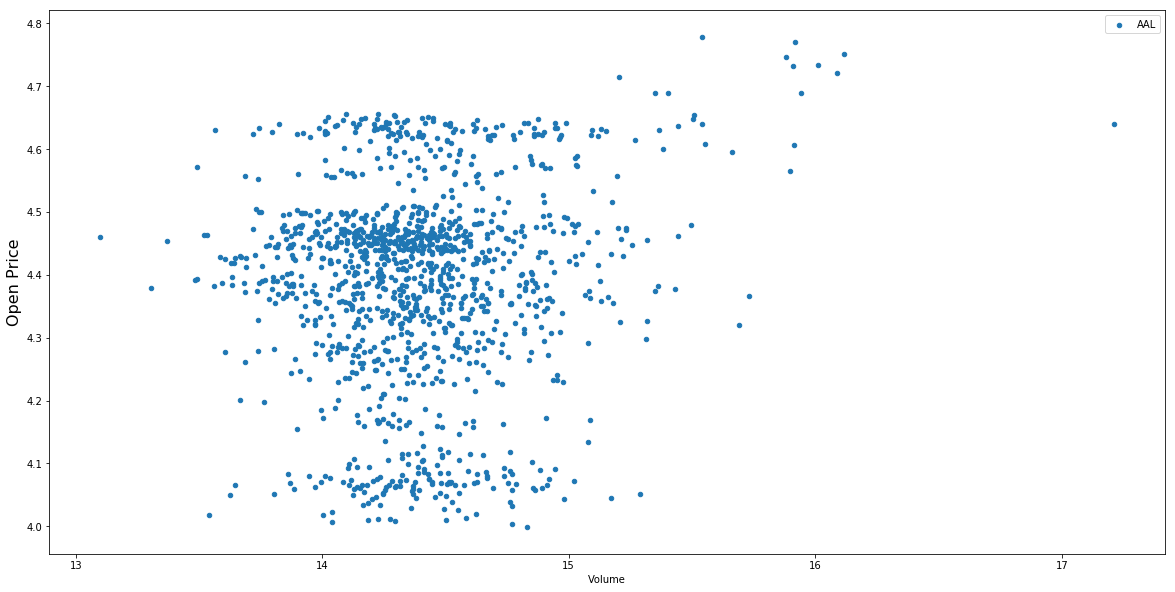

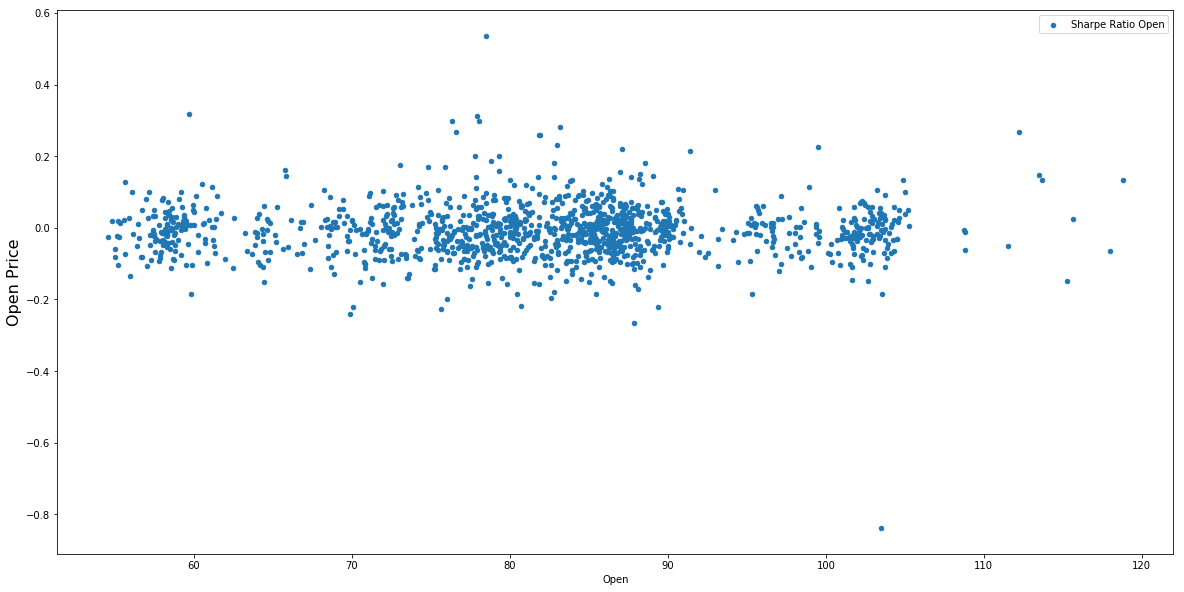

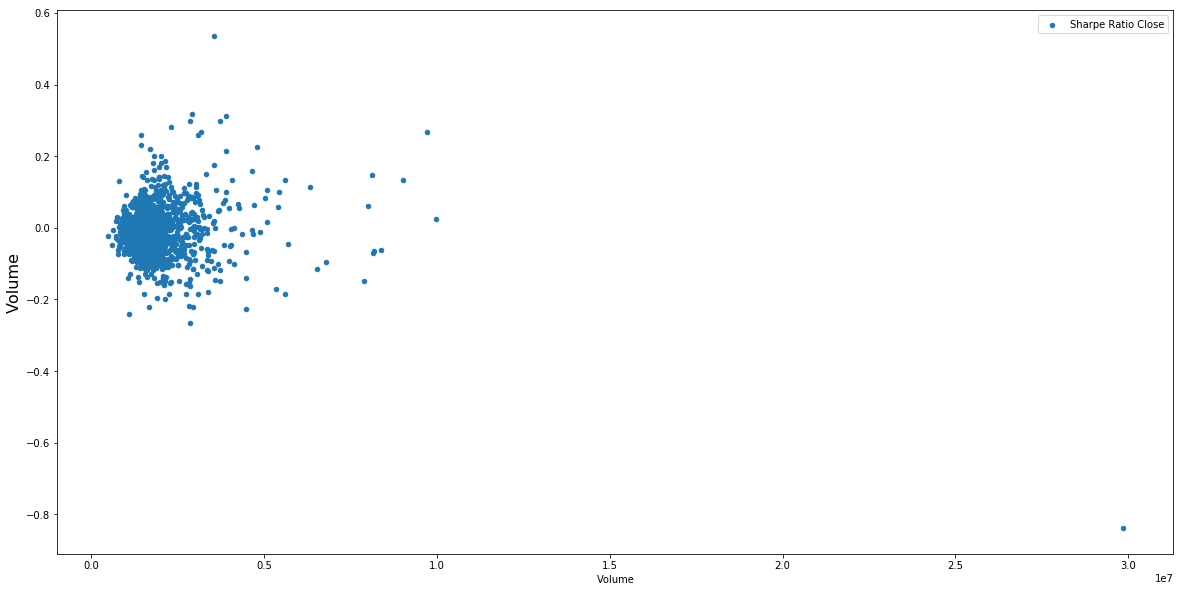

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    57.43  57.59  56.90  57.17  1541895       0.454784   
2012-08-14    57.54  57.78  57.20  57.78  1941309      -0.415369   
2012-08-15    57.63  57.99  57.55  57.84  1422683      -0.363071   
2012-08-16    57.84  58.61  57.83  58.43  1550243      -1.009755   
2012-08-17    58.66  58.66  58.19  58.51  1598972       0.256366   
2012-08-20    58.54  58.67  58.24  58.36  1196313       0.308430   
2012-08-21    58.28  58.56  58.01  58.17  1442485       0.189101   
2012-08-22    58.01  58.39  57.76  58.08  1400257      -0.120523   
2012-08-23    57.91  58.12  57.60  57.97  1074575      -0.103502   
2012-08-24    57.95  58.49  57.80  58.42  1739698      -0.804519   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13        0.032476       -0.452725  
2012-08-14       -0.036653        0.417101  
2012-08-15       -0.032499        0.364394  
2012-08-16       -0.083875        1.020055  
2012-08-17        0.016713       -0.255711  
2012-08-20        0.020849       -0.307482  
2012-08-21        0.011369       -0.188744  
2012-08-22       -0.013229        0.120669  
2012-08-23       -0.011877        0.103609  
2012-08-24       -0.067570        0.811044

ADSK


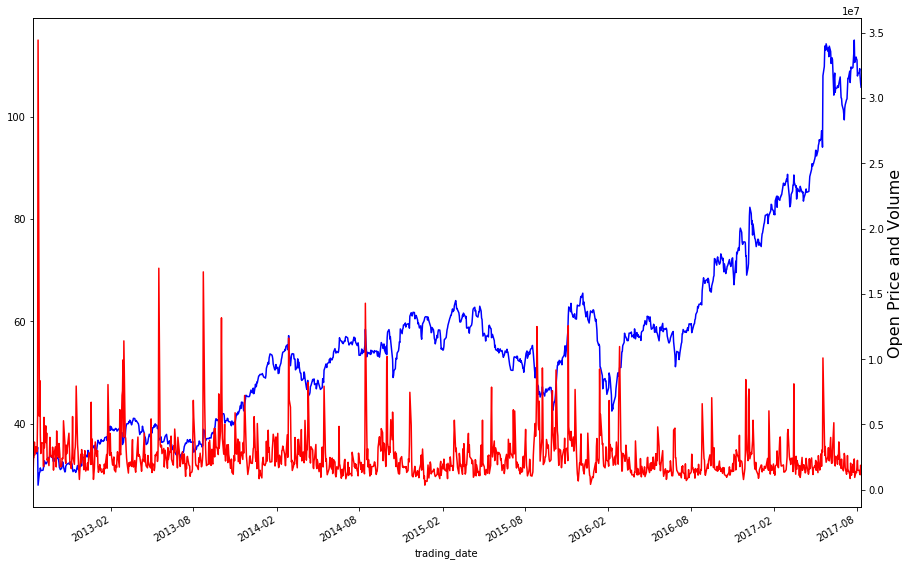

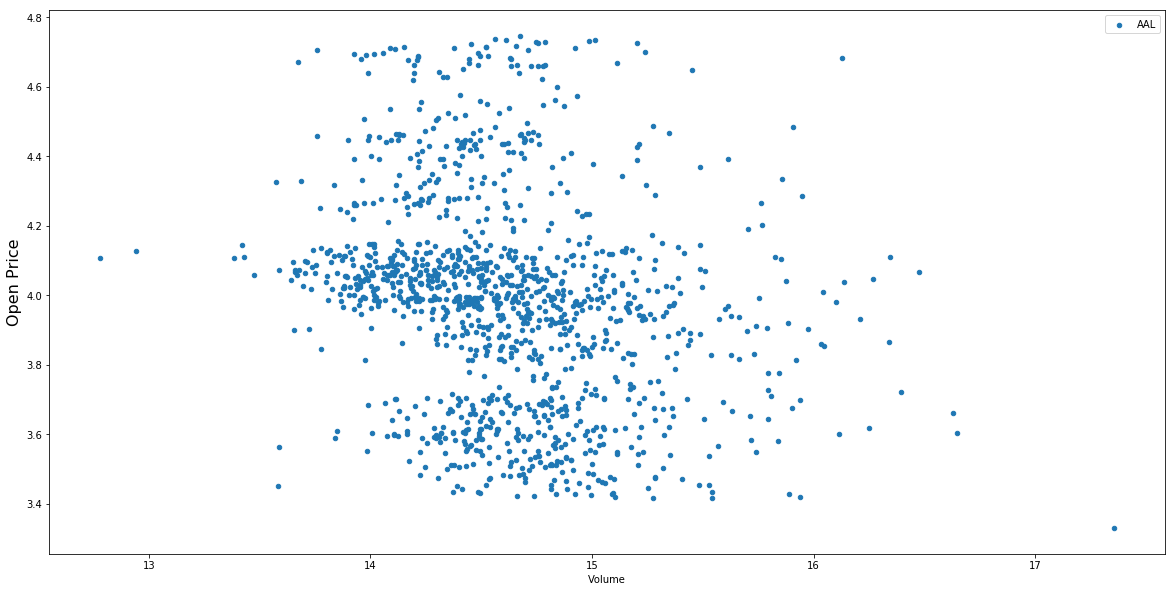

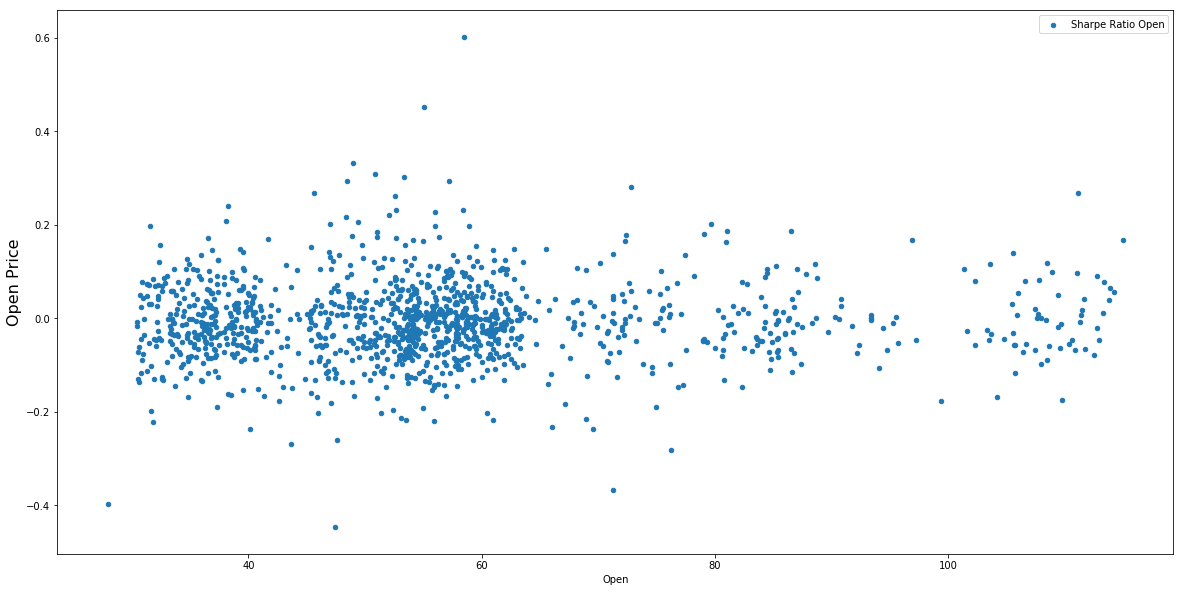

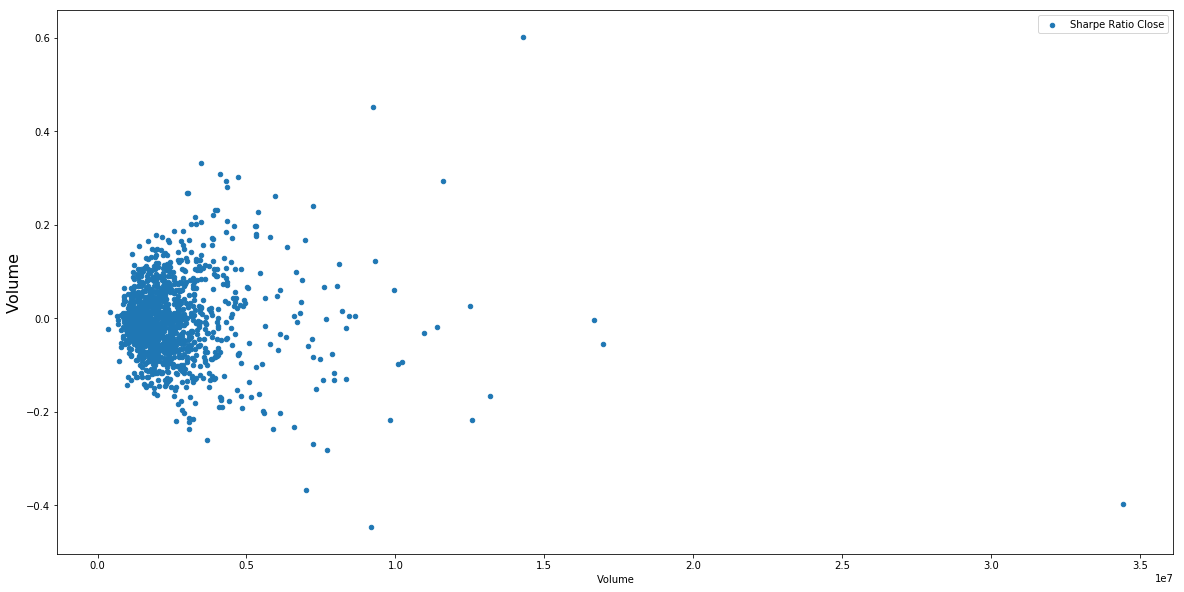

Open   High    Low  Close    Volume  Daily_Returns  \
trading_date                                                        
2012-08-13    34.86  35.05  34.32  34.68   1183143       0.519031   
2012-08-14    34.90  34.93  33.96  34.16   2409965       2.166276   
2012-08-15    34.05  34.58  34.05  34.48   2467970      -1.247100   
2012-08-16    34.61  34.89  34.02  34.67   3653546      -0.173060   
2012-08-17    34.72  35.11  34.28  34.97   2684455      -0.714898   
2012-08-20    34.76  34.91  33.72  33.96   3305198       2.355713   
2012-08-21    34.13  35.07  34.06  34.60   2902761      -1.358382   
2012-08-22    34.68  35.71  34.52  35.49   3166782      -2.282333   
2012-08-23    35.37  36.21  34.96  35.71   5778564      -0.952114   
2012-08-24    27.97  31.25  27.70  30.13  34421744      -7.168935   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13        0.026034       -0.516351  
2012-08-14        0.116692       -2.120344  
2012-08-15       -0.071167        1.262849  
2012-08-16       -0.012056        0.173360  
2012-08-17       -0.041877        0.720046  
2012-08-20        0.127118       -2.301496  
2012-08-21       -0.077292        1.377088  
2012-08-22       -0.128143        2.335640  
2012-08-23       -0.054933        0.961267  
2012-08-24       -0.397083        7.722560

ADS


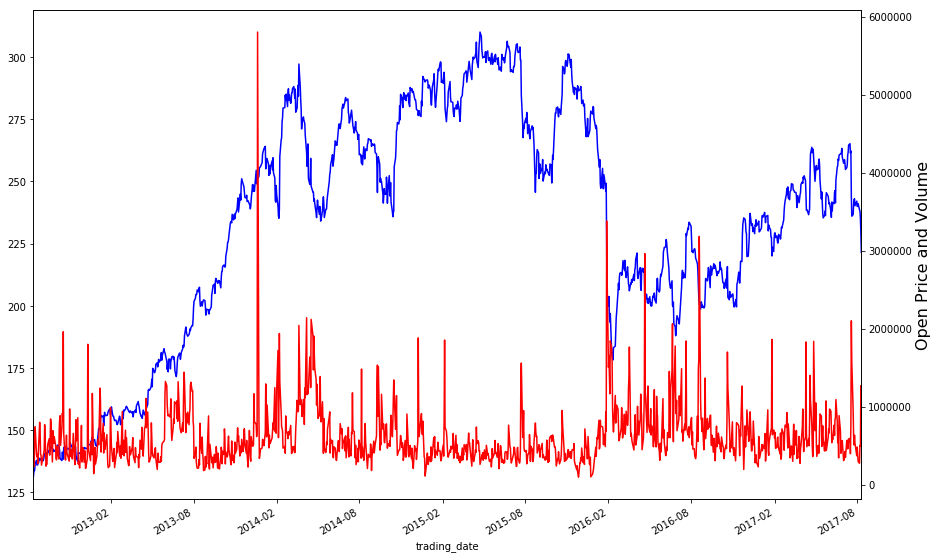

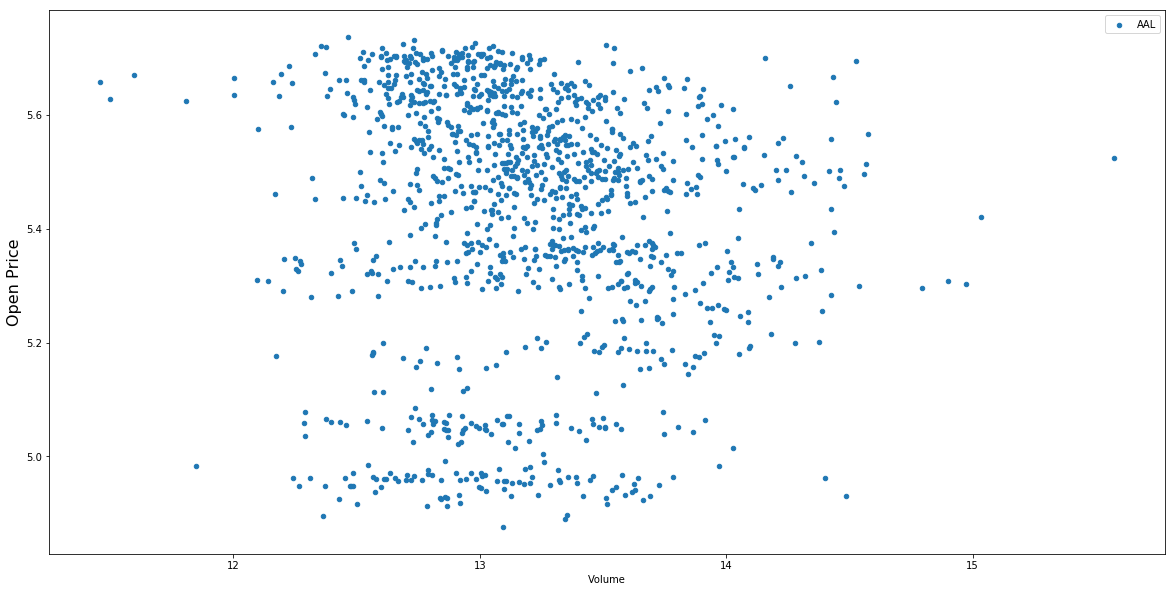

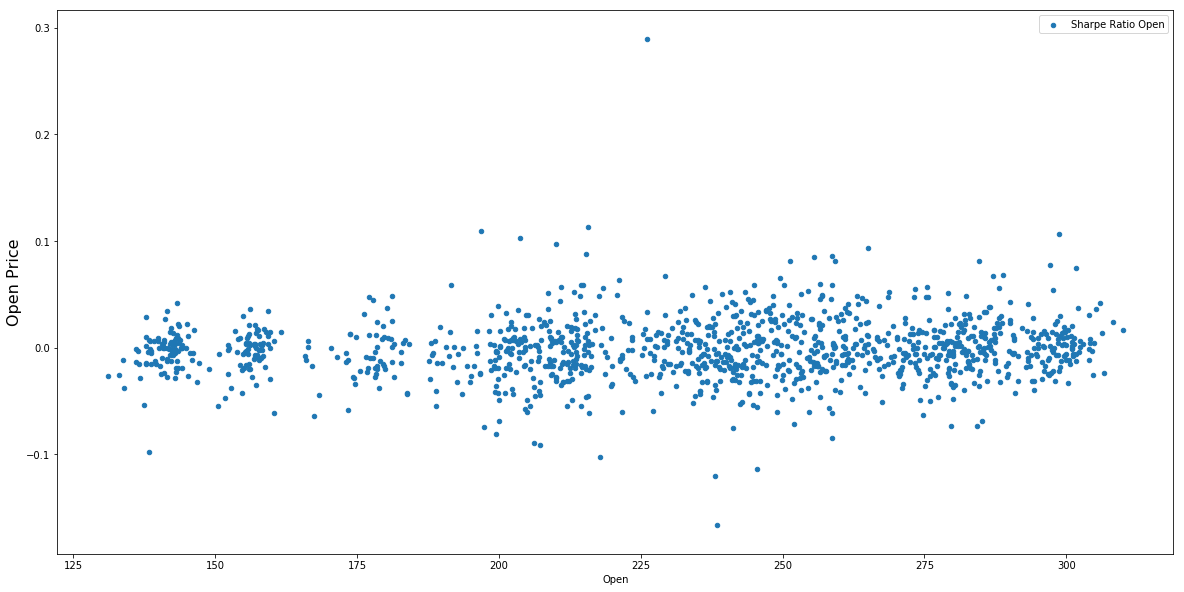

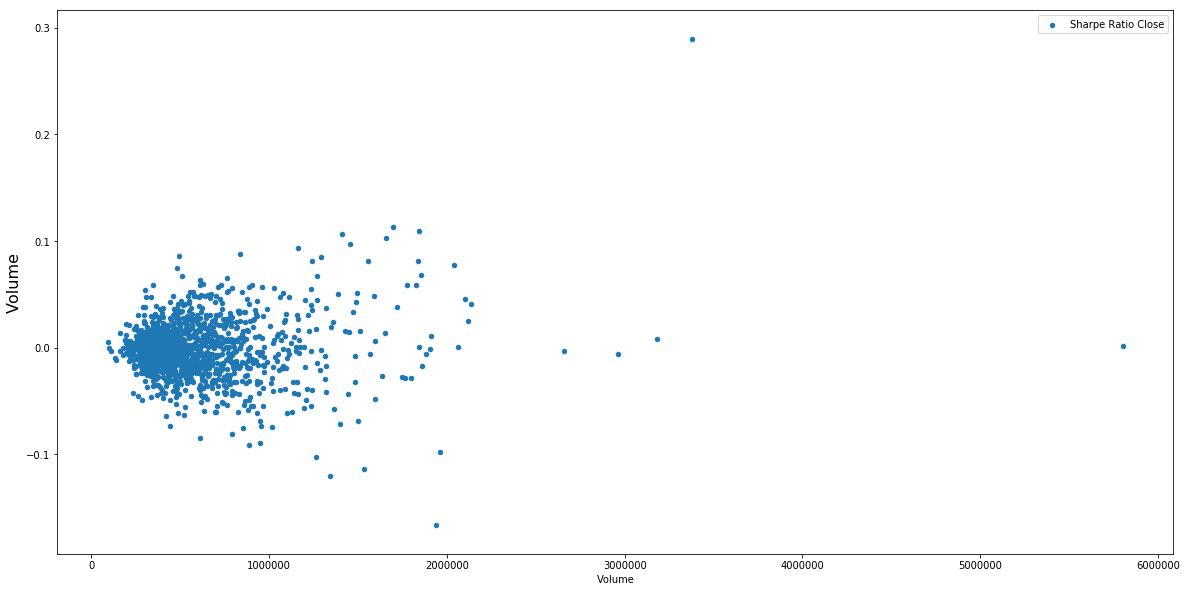

Open    High     Low   Close  Volume  Daily_Returns  \
trading_date                                                          
2012-08-13    131.15  132.95  130.84  132.72  485043      -1.182942   
2012-08-14    133.00  134.63  133.00  134.57  623984      -1.166679   
2012-08-15    133.71  134.85  133.25  134.39  234515      -0.505990   
2012-08-16    134.00  136.39  133.91  136.35  629797      -1.723506   
2012-08-17    136.56  137.83  135.88  137.47  741059      -0.661963   
2012-08-20    137.88  138.33  134.91  136.00  387880       1.382353   
2012-08-21    136.00  136.09  134.75  136.04  357716      -0.029403   
2012-08-22    136.06  137.37  135.33  136.86  387488      -0.584539   
2012-08-23    136.43  136.85  135.70  136.55  268240      -0.087880   
2012-08-24    136.69  138.68  136.18  138.49  407758      -1.299733   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.026198        1.197103  
2012-08-14       -0.025851        1.180451  
2012-08-15       -0.011767        0.508563  
2012-08-16       -0.037722        1.753731  
2012-08-17       -0.015092        0.666374  
2012-08-20        0.028488       -1.363504  
2012-08-21       -0.001607        0.029412  
2012-08-22       -0.013442        0.587976  
2012-08-23       -0.002854        0.087957  
2012-08-24       -0.028688        1.316848

AEE


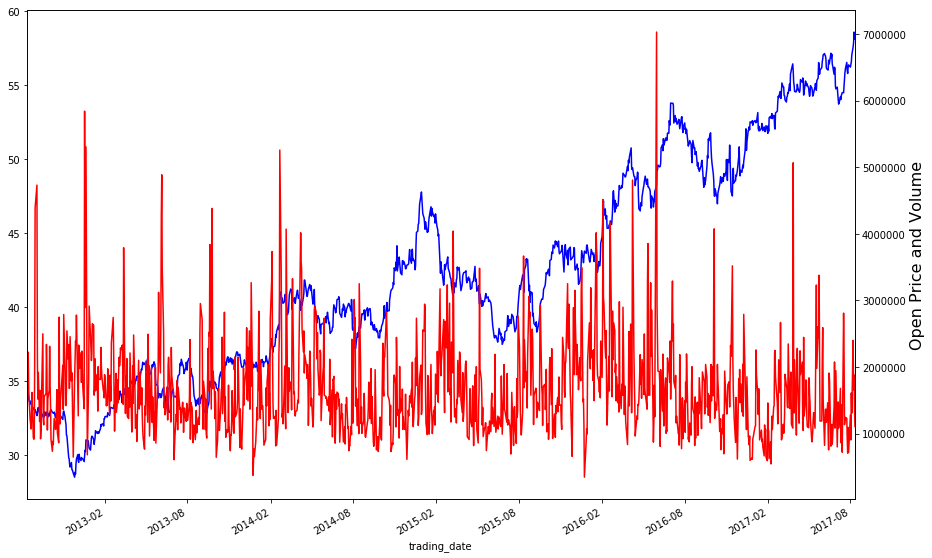

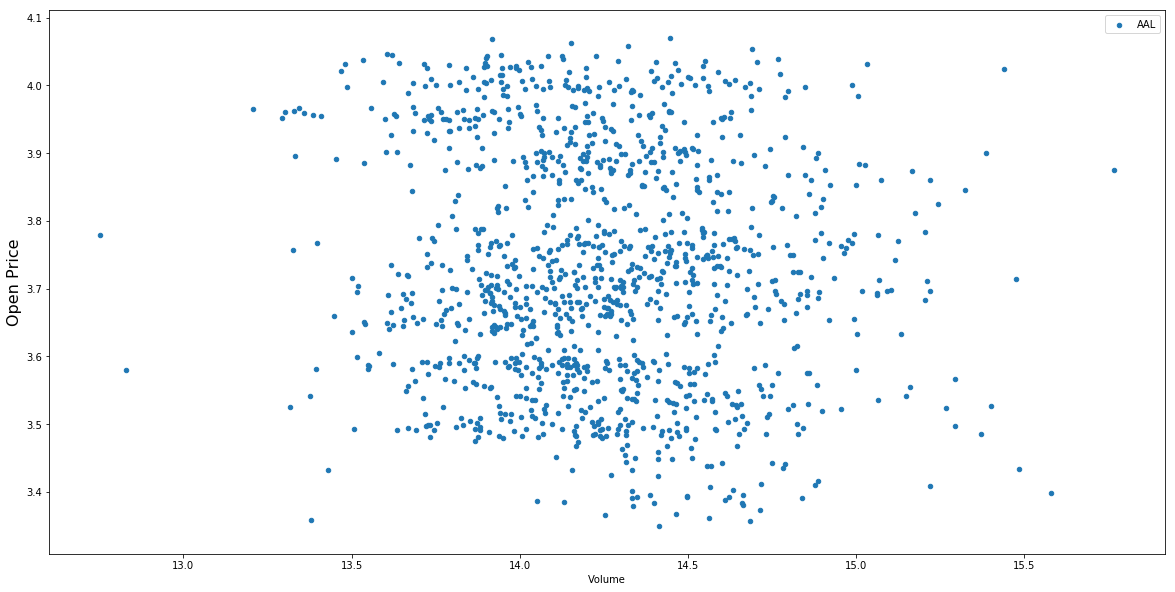

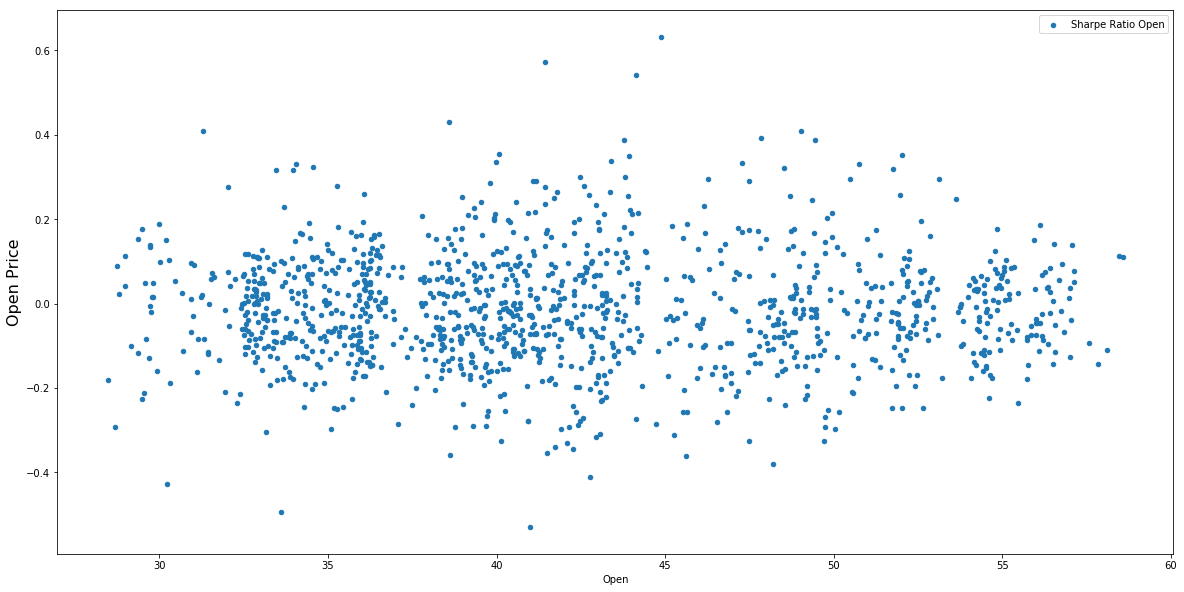

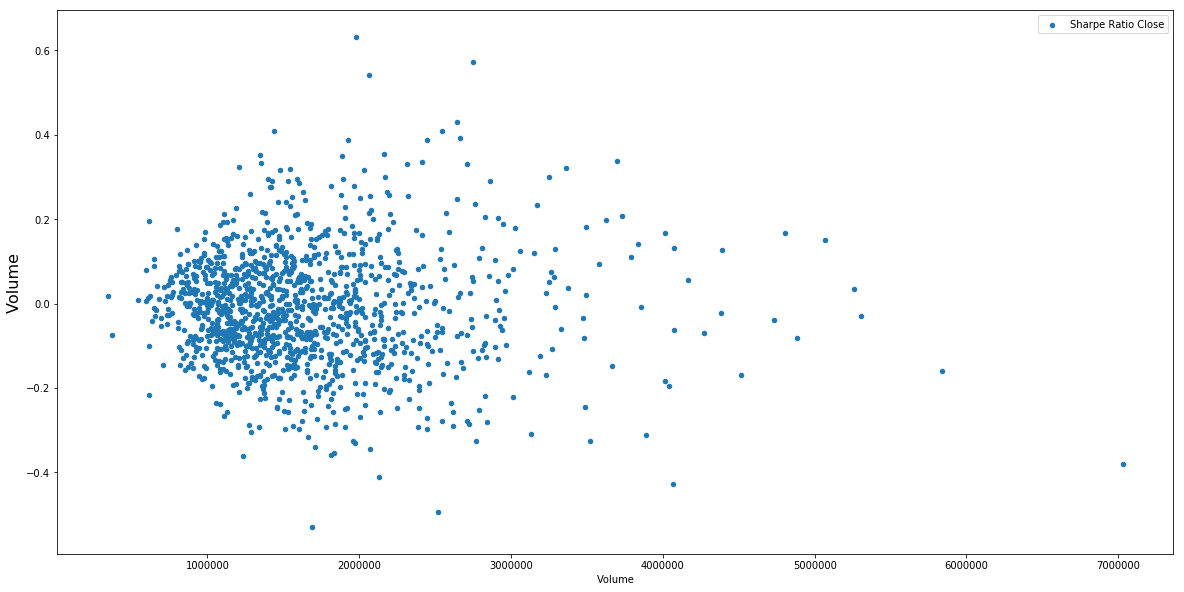

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    34.56  34.80  34.46  34.71  1988787      -0.432152   
2012-08-14    34.53  34.84  34.50  34.65  1969670      -0.346320   
2012-08-15    34.53  34.66  34.34  34.34  2226182       0.553291   
2012-08-16    34.24  34.36  33.78  33.82  2127323       1.241869   
2012-08-17    33.72  33.87  33.45  33.58  1611217       0.416915   
2012-08-20    33.47  33.73  33.39  33.68  1208709      -0.623515   
2012-08-21    33.62  33.81  33.47  33.50  1151552       0.358209   
2012-08-22    33.40  33.58  33.36  33.48  1068970      -0.238949   
2012-08-23    33.40  33.46  32.99  33.16  1256815       0.723764   
2012-08-24    33.05  33.30  33.04  33.20  1618558      -0.451807   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.065510        0.434028  
2012-08-14       -0.053750        0.347524  
2012-08-15        0.069502       -0.550246  
2012-08-16        0.163842       -1.226636  
2012-08-17        0.050818       -0.415184  
2012-08-20       -0.091728        0.627428  
2012-08-21        0.042775       -0.356930  
2012-08-22       -0.039040        0.239521  
2012-08-23        0.092858       -0.718563  
2012-08-24       -0.068203        0.453858

AEP


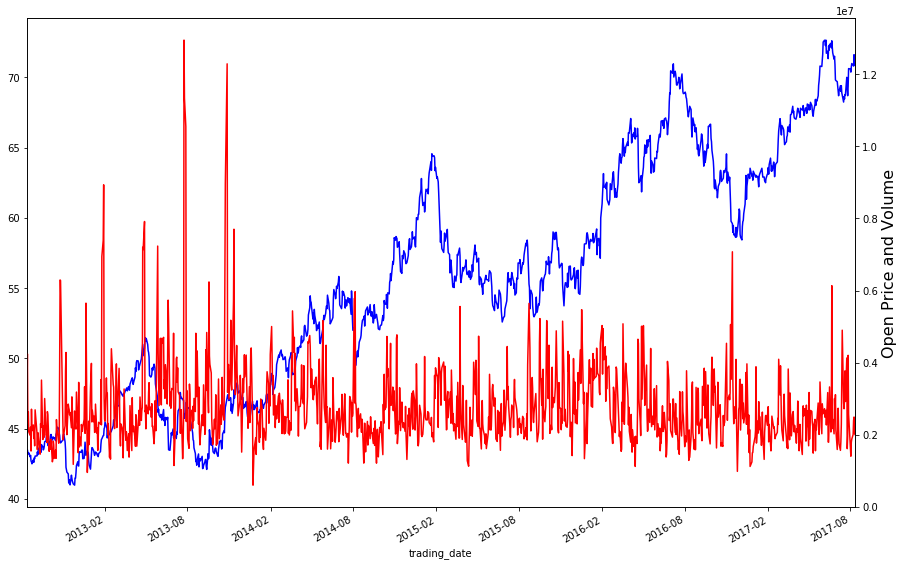

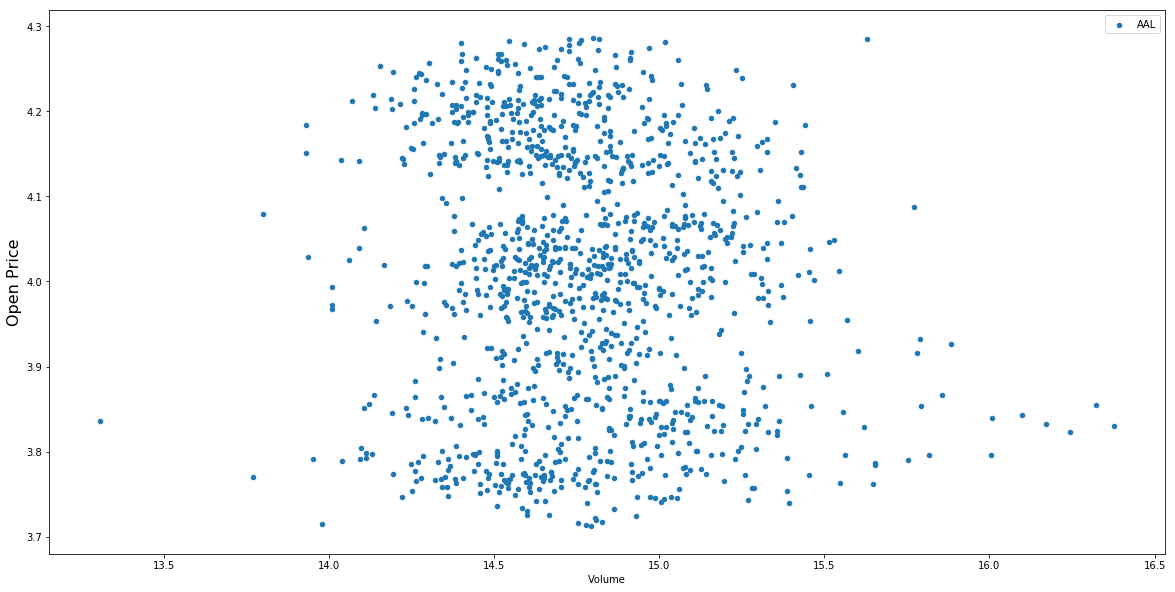

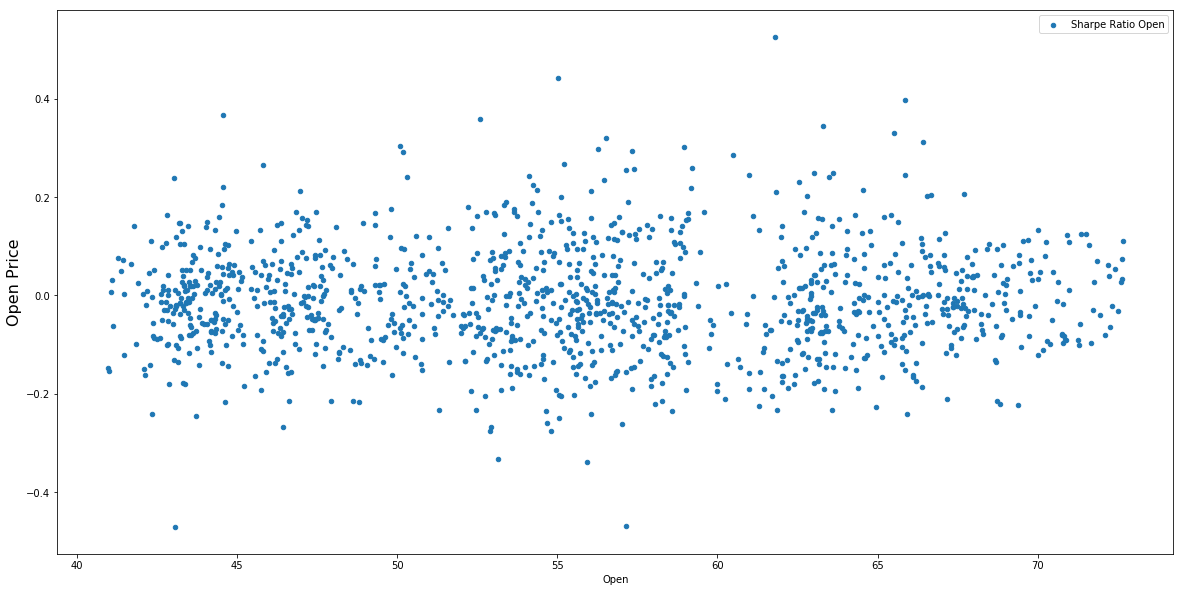

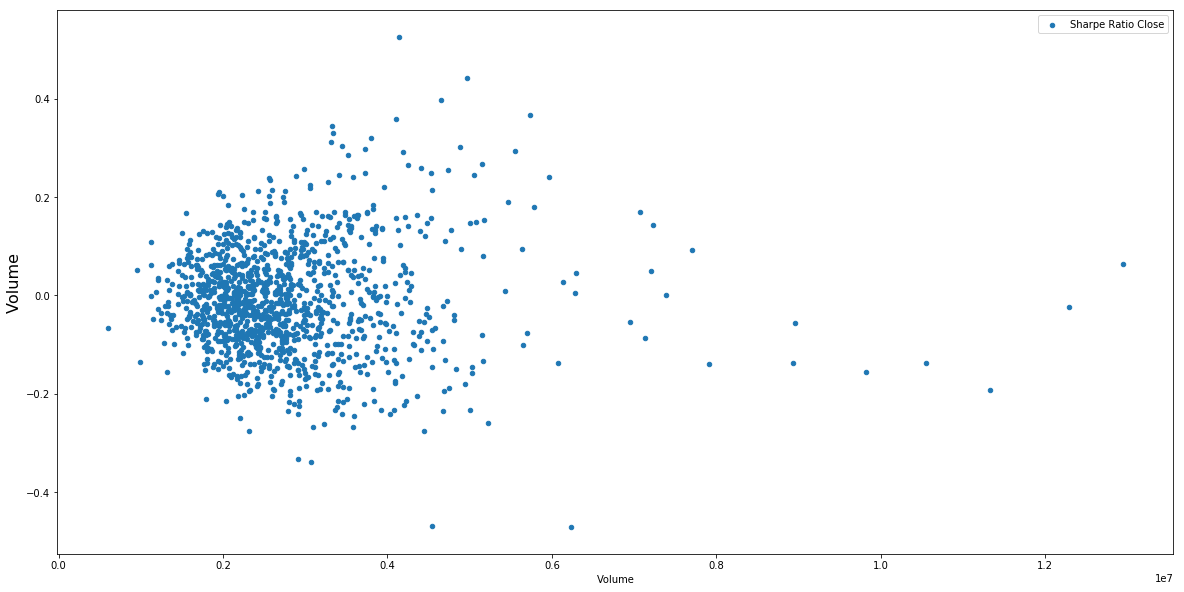

Open   High    Low  Close   Volume  Daily_Returns  \
trading_date                                                       
2012-08-13    43.42  43.55  43.31  43.46  3063263      -0.092039   
2012-08-14    43.49  43.55  43.12  43.37  4242215       0.276689   
2012-08-15    43.32  43.36  43.10  43.16  2308121       0.370714   
2012-08-16    43.21  43.50  43.12  43.25  2638663      -0.092486   
2012-08-17    43.28  43.42  42.91  43.07  2082314       0.487578   
2012-08-20    43.00  43.18  42.69  43.11  1986474      -0.255161   
2012-08-21    43.10  43.18  42.65  42.65  2210822       1.055100   
2012-08-22    42.70  42.88  42.54  42.61  1549130       0.211218   
2012-08-23    42.63  42.68  42.42  42.60  2708958       0.070423   
2012-08-24    42.50  42.84  42.39  42.80  2111065      -0.700935   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2012-08-13       -0.016364        0.092123  
2012-08-14        0.027347       -0.275926  
2012-08-15        0.038494       -0.369344  
2012-08-16       -0.016417        0.092571  
2012-08-17        0.052348       -0.485213  
2012-08-20       -0.035702        0.255814  
2012-08-21        0.119626       -1.044084  
2012-08-22        0.019586       -0.210773  
2012-08-23        0.002895       -0.070373  
2012-08-24       -0.088547        0.705882

In [11]:
# printing out the first four stocks to get an idea of how each stock is individually represented.
plotting_stocks(symbols_list, 15)

In [12]:
#below is the Daily Returns calculation to put into the Sharpe Ratio. 
dataset_preprocessed = dataset.assign(Daily_Returns = np.divide((dataset.Open - dataset.Close), dataset.Close) * 100)

In [13]:
#Below is the calculation for the Sharpe Ratio column. 
dataset_preprocessed = dataset_preprocessed.assign(Sharpe_Ratio = np.divide((dataset_preprocessed.Daily_Returns - 0.046), np.std(np.array([dataset_preprocessed.Open, dataset_preprocessed.High, dataset_preprocessed.Low, dataset_preprocessed.Close]), ddof=1)))

In [14]:
#Below is the rate of change for the specific stock. 
dataset_preprocessed = dataset_preprocessed.assign(Rate_of_Change = (np.divide(dataset_preprocessed.Close, dataset_preprocessed.Open) - 1) * 100)

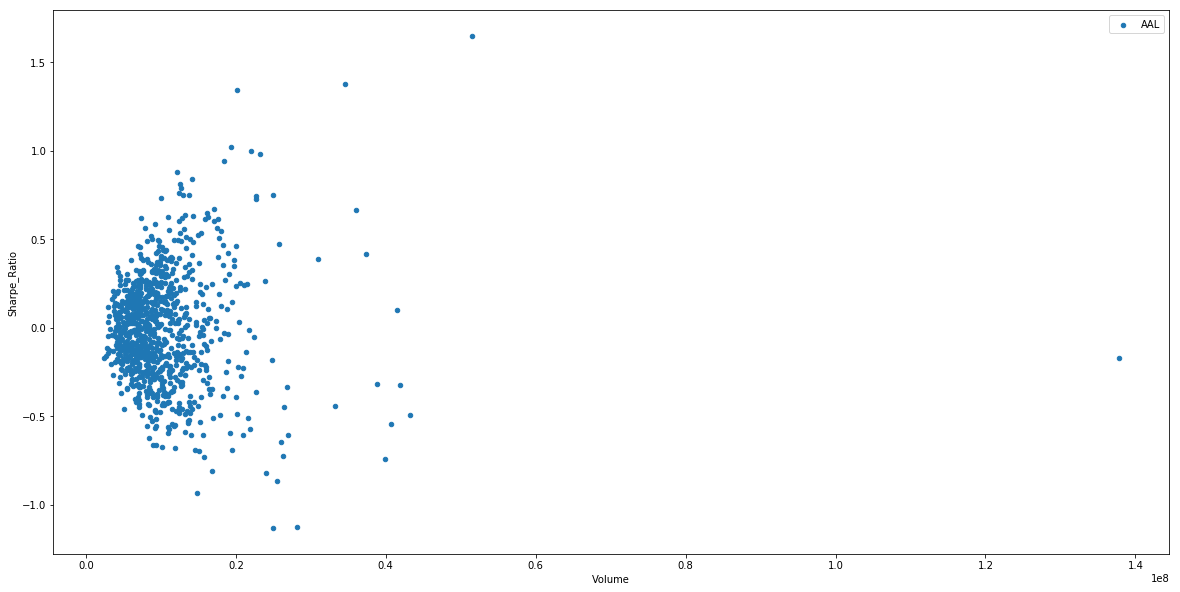

In [15]:
dataset_preprocessed.plot.scatter(x='Volume', y='Sharpe_Ratio', label="AAL", figsize=(20,10))
plt.show()

In [16]:
from IPython.display import display
display(dataset_preprocessed.head(n=1))

Open   High    Low  Close    Volume  Daily_Returns  \
trading_date                                                        
2013-12-09    23.85  25.44  23.45   24.6  43197268       -3.04878   

              Sharpe_Ratio  Rate_of_Change  
trading_date                                
2013-12-09       -0.490892        3.144654

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


In [18]:
# I am using some of the techniques I learned from previous projects.  The below is from the Finding Donors Project. 
# Label encoder example from https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
lab_enc = LabelEncoder()
closing = lab_enc.fit_transform(dataset_preprocessed['Close'])
features = dataset_preprocessed.drop('Close', axis = 1)
#features = lab_enc.fit_transform(features)

#closing_raw
#features_raw

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, closing, test_size=0.2, random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 740 samples.
Testing set has 186 samples.


In [20]:
clf = SVR()
learner = clf.fit(X_train, y_train)

In [21]:
pred = clf.predict(X_test)

# This next section will be the creation of the RNN-LSTM model. 

Some information gathered from https://machinelearningmastery.com

From my research and many hours of trial and error I have discovered that the preprocessing needs to be different for the RNN-LSTM as compared to the SVC.  https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Data preprocessing for the RNN-LSTM model

In [23]:
#from machinelearningmastery.com
dataset = dataset_preprocessed.values
dataset = dataset.astype('float32')

print(dataset_preprocessed.shape)

(926, 8)


In [24]:
training_set = int(len(dataset) * 0.80)
testing_set = len(dataset) - training_set

In [25]:
X_train_rnn = dataset[0:training_set]
X_test_rnn = dataset[training_set:len(dataset)]

print(X_train_rnn.shape)
print(X_test_rnn.shape)

#X_train = np.reshape(X_train_rnn, (X_train_rnn.shape[0], 1, X_train_rnn.shape[1]))
#X_train = np.reshape(X_train_rnn, (X_train_rnn.shape[0], 64))
#X_test = np.reshape(X_test_rnn, (X_test_rnn.shape[0], 1, X_test_rnn.shape[1]))

(740, 8)
(186, 8)


In [26]:
rnn_model = Sequential()
rnn_model.add(LSTM(64, batch_input_shape=(len(X_train), 1, 8)))
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (740, 64)                 18688     
Total params: 18,688
Trainable params: 18,688
Non-trainable params: 0
_________________________________________________________________


In [27]:
rnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['mae'])

In [28]:
print(X_train.shape)
print(rnn_model.input)

(740, 7)
Tensor("lstm_1_input:0", shape=(740, 1, 8), dtype=float32)


In [29]:
rnn_model.fit(X_train, y_train, epochs=100)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (740, 7)

Resource used: https://www.kaggle.com/kwrjcr/predict-stock-prices-with-lstm/editnb

One of my major issues was I was treating the RNN like the rest of the techniques and models I have learned.  I didn't realize that I needed to think of it as a separate model, with its own needs and quarks.  Special thanks to Jason Brownlee of MachineLearningMastery.com for creating a great resource. 